In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
out_df=pd.read_csv("/content/drive/MyDrive/MetaOmics_ML/combined_otu_data.tsv", sep='\t')
out_df

,name,taxonomy_id,taxonomy_lvl,SRR32732804.bracken.out_num,SRR32732804.bracken.out_frac,SRR32732805.bracken.out_num,SRR32732805.bracken.out_frac,SRR32732806.bracken.out_num,SRR32732806.bracken.out_frac,SRR32732807.bracken.out_num,...,SRR32733696.bracken.out_num,SRR32733696.bracken.out_frac,SRR32733697.bracken.out_num,SRR32733697.bracken.out_frac,SRR32733698.bracken.out_num,SRR32733698.bracken.out_frac,SRR32733699.bracken.out_num,SRR32733699.bracken.out_frac,SRR32733700.bracken.out_num,SRR32733700.bracken.out_frac
0,Bacteroides xylanisolvens,2057,S,3232092,0.11391,383411,0.01311,63773,0.00160,204219,...,135885,0.00387,61316,0.00147,71793,0.00174,93594,0.00320,195599,0.00405
1,Bacteroides finegoldii,151,S,851026,0.02999,34049,0.00116,17527,0.00044,51546,...,23166,0.00066,16353,0.00039,262154,0.00634,215860,0.00738,29743,0.00062
2,Bacteroides ovatus,2098,S,631604,0.02226,195250,0.00668,53197,0.00134,4002970,...,353907,0.01008,5248,0.00013,245473,0.00594,28510,0.00097,409488,0.00848
3,Bacteroides sp902362375,104,S,499300,0.01760,117253,0.00401,14670,0.00037,85542,...,54273,0.00155,4176,0.00010,37103,0.00090,8360,0.00029,67425,0.00140
4,Bacteroides nordii,546,S,123744,0.00436,27246,0.00093,8643,0.00022,170255,...,87856,0.00250,2923,0.00007,37388,0.00090,14192,0.00048,27676,0.00057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,Campylobacter_D coli_B,3304,S,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4626,Helicobacter pylori_BU,2194,S,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4627,Methanobacterium sp000499765,58,S,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4628,Campylobacter fetus,1077,S,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000


In [3]:
rmv_col=["taxonomy_id",	"taxonomy_lvl"]
imp_col=out_df.drop(rmv_col, axis=1)
imp_col

,name,SRR32732804.bracken.out_num,SRR32732804.bracken.out_frac,SRR32732805.bracken.out_num,SRR32732805.bracken.out_frac,SRR32732806.bracken.out_num,SRR32732806.bracken.out_frac,SRR32732807.bracken.out_num,SRR32732807.bracken.out_frac,SRR32732808.bracken.out_num,...,SRR32733696.bracken.out_num,SRR32733696.bracken.out_frac,SRR32733697.bracken.out_num,SRR32733697.bracken.out_frac,SRR32733698.bracken.out_num,SRR32733698.bracken.out_frac,SRR32733699.bracken.out_num,SRR32733699.bracken.out_frac,SRR32733700.bracken.out_num,SRR32733700.bracken.out_frac
0,Bacteroides xylanisolvens,3232092,0.11391,383411,0.01311,63773,0.00160,204219,0.00586,1464145,...,135885,0.00387,61316,0.00147,71793,0.00174,93594,0.00320,195599,0.00405
1,Bacteroides finegoldii,851026,0.02999,34049,0.00116,17527,0.00044,51546,0.00148,102643,...,23166,0.00066,16353,0.00039,262154,0.00634,215860,0.00738,29743,0.00062
2,Bacteroides ovatus,631604,0.02226,195250,0.00668,53197,0.00134,4002970,0.11494,1331243,...,353907,0.01008,5248,0.00013,245473,0.00594,28510,0.00097,409488,0.00848
3,Bacteroides sp902362375,499300,0.01760,117253,0.00401,14670,0.00037,85542,0.00246,234381,...,54273,0.00155,4176,0.00010,37103,0.00090,8360,0.00029,67425,0.00140
4,Bacteroides nordii,123744,0.00436,27246,0.00093,8643,0.00022,170255,0.00489,31901,...,87856,0.00250,2923,0.00007,37388,0.00090,14192,0.00048,27676,0.00057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,Campylobacter_D coli_B,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4626,Helicobacter pylori_BU,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4627,Methanobacterium sp000499765,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4628,Campylobacter fetus,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000


In [4]:
imp_col.index=out_df['name'].values
imp_col # makes the row labels (index) of imp_col equal to the values in the name column of out_df.

,name,SRR32732804.bracken.out_num,SRR32732804.bracken.out_frac,SRR32732805.bracken.out_num,SRR32732805.bracken.out_frac,SRR32732806.bracken.out_num,SRR32732806.bracken.out_frac,SRR32732807.bracken.out_num,SRR32732807.bracken.out_frac,SRR32732808.bracken.out_num,...,SRR32733696.bracken.out_num,SRR32733696.bracken.out_frac,SRR32733697.bracken.out_num,SRR32733697.bracken.out_frac,SRR32733698.bracken.out_num,SRR32733698.bracken.out_frac,SRR32733699.bracken.out_num,SRR32733699.bracken.out_frac,SRR32733700.bracken.out_num,SRR32733700.bracken.out_frac
Bacteroides xylanisolvens,Bacteroides xylanisolvens,3232092,0.11391,383411,0.01311,63773,0.00160,204219,0.00586,1464145,...,135885,0.00387,61316,0.00147,71793,0.00174,93594,0.00320,195599,0.00405
Bacteroides finegoldii,Bacteroides finegoldii,851026,0.02999,34049,0.00116,17527,0.00044,51546,0.00148,102643,...,23166,0.00066,16353,0.00039,262154,0.00634,215860,0.00738,29743,0.00062
Bacteroides ovatus,Bacteroides ovatus,631604,0.02226,195250,0.00668,53197,0.00134,4002970,0.11494,1331243,...,353907,0.01008,5248,0.00013,245473,0.00594,28510,0.00097,409488,0.00848
Bacteroides sp902362375,Bacteroides sp902362375,499300,0.01760,117253,0.00401,14670,0.00037,85542,0.00246,234381,...,54273,0.00155,4176,0.00010,37103,0.00090,8360,0.00029,67425,0.00140
Bacteroides nordii,Bacteroides nordii,123744,0.00436,27246,0.00093,8643,0.00022,170255,0.00489,31901,...,87856,0.00250,2923,0.00007,37388,0.00090,14192,0.00048,27676,0.00057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,Campylobacter_D coli_B,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Helicobacter pylori_BU,Helicobacter pylori_BU,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Methanobacterium sp000499765,Methanobacterium sp000499765,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Campylobacter fetus,Campylobacter fetus,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000


In [5]:
num_columns =[col for col in imp_col.columns if col.endswith('_num')]
brack_df = imp_col[num_columns]
brack_df

,SRR32732804.bracken.out_num,SRR32732805.bracken.out_num,SRR32732806.bracken.out_num,SRR32732807.bracken.out_num,SRR32732808.bracken.out_num,SRR32732809.bracken.out_num,SRR32732810.bracken.out_num,SRR32732811.bracken.out_num,SRR32732813.bracken.out_num,SRR32732814.bracken.out_num,...,SRR32733691.bracken.out_num,SRR32733692.bracken.out_num,SRR32733693.bracken.out_num,SRR32733694.bracken.out_num,SRR32733695.bracken.out_num,SRR32733696.bracken.out_num,SRR32733697.bracken.out_num,SRR32733698.bracken.out_num,SRR32733699.bracken.out_num,SRR32733700.bracken.out_num
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Helicobacter pylori_BU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Methanobacterium sp000499765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Campylobacter fetus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
brack_df.columns = brack_df.columns.str.extract(r'([^\.]+)\.bracken\.out_num')[0]
brack_df # to remove " bracken.out_num " extension----> to clean column name

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Helicobacter pylori_BU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Methanobacterium sp000499765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Campylobacter fetus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
brack_df.index = out_df['name'].values
brack_df

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Helicobacter pylori_BU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Methanobacterium sp000499765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Campylobacter fetus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **मशीन लर्न करेगा**

In [8]:
brack_df

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Helicobacter pylori_BU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Methanobacterium sp000499765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Campylobacter fetus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Step 1: Convert counts to presence/absence (1 if count > 0, else 0)
presence_absence = (brack_df > 0).astype(int)

presence_absence

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Bacteroides finegoldii,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Bacteroides ovatus,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Bacteroides sp902362375,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Bacteroides nordii,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Helicobacter pylori_BU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Methanobacterium sp000499765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Campylobacter fetus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **A THRESHOLD APPLIED**
# ⚓

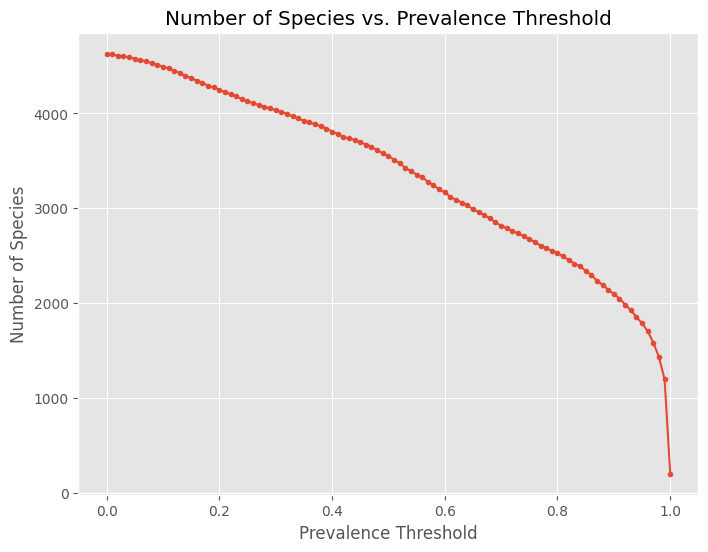

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Step 2: Calculate prevalence (proportion of samples where species is present)
prevalence = presence_absence.mean(axis=1)  # takes the mean across samples (columns) for each species.

# Step 3: Count species above prevalence thresholds
thresholds = np.arange(0, 1.01, 0.01)  # creates thresholds from 0.00 to 1.00 in steps of 0.01
species_counts = [sum(prevalence >= t) for t in thresholds]  # Number of species above each threshold

# Step 4: Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(thresholds, species_counts, marker='.', linestyle='-')
plt.xlabel('Prevalence Threshold')
plt.ylabel('Number of Species')
plt.title('Number of Species vs. Prevalence Threshold')
plt.grid(True)
plt.show()

Species with prevalence > 0.2:
                           Prevalence
Bacteroides xylanisolvens    0.994125
Bacteroides finegoldii       0.997650
Bacteroides ovatus           0.995300
Bacteroides sp902362375      0.994125
Bacteroides nordii           0.995300
...                               ...
Enterococcus_C dispar        0.213866
MGYG000000342                0.278496
HGM20899 sp900767005         0.272620
Enterovibrio hollisae        0.239718
Timonella senegalensis       0.220917

[4248 rows x 1 columns]


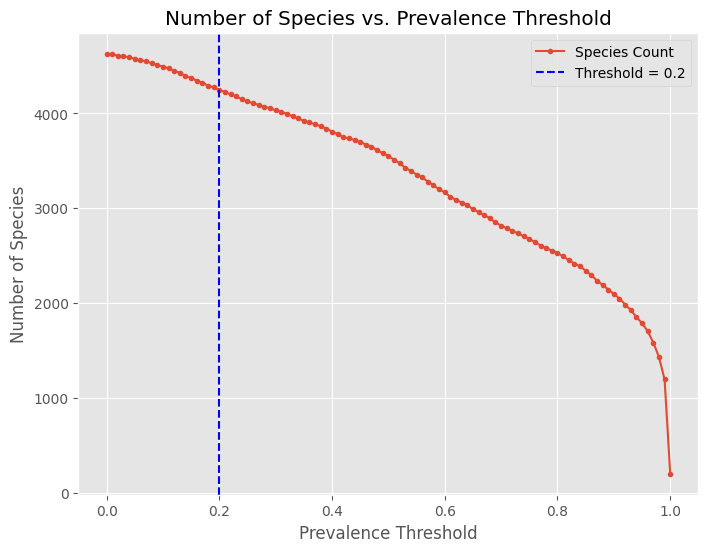

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Convert counts to presence/absence (1 if count > 0, else 0)
presence_absence = (brack_df > 0).astype(int)

# Step 2: Calculate prevalence (proportion of samples where species is present)
prevalence = presence_absence.mean(axis=1)

# Step 3: Filter species with prevalence > 0.2
threshold = 0.2
selected_species = prevalence[prevalence > threshold]

# Step 4: Print selected species and their prevalence
print(f"Species with prevalence > {threshold}:")
print(selected_species.to_frame(name='Prevalence'))

# Step 5: Plot number of species vs. prevalence threshold with 20% line
thresholds = np.arange(0, 1.01, 0.01)
species_counts = [sum(prevalence >= t) for t in thresholds]

plt.figure(figsize=(8, 6))
plt.plot(thresholds, species_counts, marker='.', linestyle='-', label='Species Count')
plt.axvline(x=threshold, color='blue', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel('Prevalence Threshold')
plt.ylabel('Number of Species')
plt.title('Number of Species vs. Prevalence Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
import pandas as pd

# Assume brack_num_df is your DataFrame
# Example: brack_num_df = pd.read_csv('your_file.csv', index_col=0)

# Step 1: Convert counts to presence/absence (1 if count > 0, else 0)
presence_absence = (brack_df > 0).astype(int)#Creates a Boolean DataFrame (True if value > 0, False otherwise). Converts True → 1 and False → 0
#
# Step 2: Calculate prevalence (proportion of samples where species is present)
prevalence = presence_absence.mean(axis=1)

# Step 3: Filter species with prevalence
threshold = 0.9
selected_species = prevalence[prevalence > threshold].index

# Step 4: Filter the original DataFrame to include only selected species
filtered_df = brack_df.loc[selected_species]

# Step 5: Output the filtered table
print(f"Filtered table for species with prevalence > {threshold}:")
print(filtered_df)

# Optionally, save the filtered table to a CSV file
# filtered_df.to_csv('filtered_species_prevalence_above_10_percent.csv')

Filtered table for species with prevalence > 0.9:
0                          SRR32732804  SRR32732805  SRR32732806  SRR32732807  \
Bacteroides xylanisolvens      3232092       383411        63773       204219   
Bacteroides finegoldii          851026        34049        17527        51546   
Bacteroides ovatus              631604       195250        53197      4002970   
Bacteroides sp902362375         499300       117253        14670        85542   
Bacteroides nordii              123744        27246         8643       170255   
...                                ...          ...          ...          ...   
Kosakonia cowanii                    0          236            0          791   
Leptotrichia wadei                   0           40          201           84   
Bruticola sp004554425                0          238            0          416   
MGYG000004312                        0          113          281           15   
Prevotella sp900769055               0            0        

In [78]:
brack_num_df=filtered_df
brack_num_df

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosakonia cowanii,0,236,0,791,389,94,102,305,371,39,...,1006,370,19,22,278,14,487,313,228,666
Leptotrichia wadei,0,40,201,84,87,25,55,54,89,0,...,309,157,12,35,53,0,146,15,27,178
Bruticola sp004554425,0,238,0,416,279,102,655,340,1418,211,...,40,32,849,0,553,393,225,168,175,156
MGYG000004312,0,113,281,15,0,634,135,273,46,215,...,693,12,82,127,100,30,0,362,157,34


# **CLR-transformation**

In [79]:
from scipy.stats import gmean #gmean=(x1​×x2​×...×xn​)1/n
 # The geometric mean is like the average, but instead of adding numbers, it multiplies them and then takes the root.
# Step 1: Handle zeros (add a small pseudo-count to avoid log(0))
pseudo_count = 1 #Why? Because log(0) is undefined (you can’t take the log of 0).
brack_num_df_no_zeros = brack_num_df + pseudo_count

# Step 2: Compute the geometric mean for each sample (column)
# Geometric mean is calculated across taxa for each sample
geometric_means = brack_num_df_no_zeros.apply(gmean, axis=0)


# CLR = log(x / g(x)), where g(x) is the geometric mean of the sample
clr_transformed = np.log(brack_num_df_no_zeros.divide(geometric_means, axis=1))#.divide(..., axis=1) → divide each column by its geometric mean.
#np.log() → apply log transformation.

# Step 4: Output the transformed DataFrame
clr_transformed_df = pd.DataFrame(clr_transformed, index=brack_num_df.index, columns=brack_num_df.columns)

# Display the first few rows of the CLR-transformed DataFrame
print(clr_transformed_df.head())



0                          SRR32732804  SRR32732805  SRR32732806  SRR32732807  \
Bacteroides xylanisolvens     8.806365     6.195401     4.837280     6.483334   
Bacteroides finegoldii        7.471924     3.774120     3.545734     5.106630   
Bacteroides ovatus            7.173744     5.520576     4.655955     9.458928   
Bacteroides sp902362375       6.938689     5.010633     3.367807     5.613155   
Bacteroides nordii            5.543703     3.551234     2.838800     6.301439   

0                          SRR32732808  SRR32732809  SRR32732810  SRR32732811  \
Bacteroides xylanisolvens     7.441161     4.678445     5.619644     5.716022   
Bacteroides finegoldii        4.783400     2.141931     4.159587     4.086912   
Bacteroides ovatus            7.346002     4.636975     6.437780     6.951106   
Bacteroides sp902362375       5.609086     2.762946     4.592257     5.058229   
Bacteroides nordii            3.614802     1.179466     3.627175     1.432693   

0                         

In [80]:
clr_transformed_df.T

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,Streptococcus mutans,CAG-451 sp900760545,MGYG000004829,MGYG000004749,Azonexus sp900549295,Kosakonia cowanii,Leptotrichia wadei,Bruticola sp004554425,MGYG000004312,Prevotella sp900769055
0,,,,,,,,,,,,,,,,,,,,,
SRR32732804,8.806365,7.471924,7.173744,6.938689,5.543703,5.570383,5.380088,5.130246,5.118385,5.028775,...,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275
SRR32732805,6.195401,3.774120,5.520576,5.010633,3.551234,5.181836,4.437172,2.644458,3.991267,2.951804,...,-3.828252,-1.201879,-2.207118,-4.022408,-1.383350,-1.193405,-2.947893,-1.185001,-1.925266,-6.661465
SRR32732806,4.837280,3.545734,4.655955,3.367807,2.838800,9.772121,5.695259,1.608967,6.879258,7.053572,...,-3.660872,-1.107827,-0.231860,-2.614903,-2.614903,-6.225821,-0.917553,-6.225821,-0.583914,-6.225821
SRR32732807,6.483334,5.106630,9.458928,5.613155,6.301439,4.799325,6.114512,4.828415,6.527403,4.389829,...,-2.080058,-1.148499,-1.495124,-0.816366,1.907025,0.930942,-1.300968,0.289467,-2.971031,-0.420609
SRR32732808,7.441161,4.783400,7.346002,5.609086,3.614802,3.126642,5.095710,1.950206,4.405218,2.714155,...,-3.983033,-2.661277,-1.238169,-2.994422,-0.917891,-0.789475,-2.278285,-1.120832,-6.755622,-0.781812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR32733696,5.152854,3.383767,6.110075,4.235083,4.716748,7.470711,3.182631,6.903389,4.999650,5.055318,...,-3.722278,-3.488663,-1.966237,-2.272268,-0.794600,-3.958667,-6.666717,-0.690366,-3.232730,-2.349229
SRR32733697,4.444417,3.122833,1.986398,1.757954,1.401313,7.918664,3.542786,1.053975,4.627155,4.512683,...,-3.145408,-1.306395,-0.780302,-3.024047,-1.065966,-0.389080,-1.588962,-1.158860,-6.579395,-6.579395
SRR32733698,4.029992,5.325127,5.259383,3.369916,3.377568,4.235708,2.576141,1.769627,2.613236,2.911147,...,-7.151564,-0.657810,-2.782116,-2.253724,0.363781,-1.402171,-4.378975,-2.021665,-1.257161,-3.200320


In [81]:
otu_table=clr_transformed_df.T # transpose the matrix row for sample and columns for species
otu_table

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,Streptococcus mutans,CAG-451 sp900760545,MGYG000004829,MGYG000004749,Azonexus sp900549295,Kosakonia cowanii,Leptotrichia wadei,Bruticola sp004554425,MGYG000004312,Prevotella sp900769055
0,,,,,,,,,,,,,,,,,,,,,
SRR32732804,8.806365,7.471924,7.173744,6.938689,5.543703,5.570383,5.380088,5.130246,5.118385,5.028775,...,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275
SRR32732805,6.195401,3.774120,5.520576,5.010633,3.551234,5.181836,4.437172,2.644458,3.991267,2.951804,...,-3.828252,-1.201879,-2.207118,-4.022408,-1.383350,-1.193405,-2.947893,-1.185001,-1.925266,-6.661465
SRR32732806,4.837280,3.545734,4.655955,3.367807,2.838800,9.772121,5.695259,1.608967,6.879258,7.053572,...,-3.660872,-1.107827,-0.231860,-2.614903,-2.614903,-6.225821,-0.917553,-6.225821,-0.583914,-6.225821
SRR32732807,6.483334,5.106630,9.458928,5.613155,6.301439,4.799325,6.114512,4.828415,6.527403,4.389829,...,-2.080058,-1.148499,-1.495124,-0.816366,1.907025,0.930942,-1.300968,0.289467,-2.971031,-0.420609
SRR32732808,7.441161,4.783400,7.346002,5.609086,3.614802,3.126642,5.095710,1.950206,4.405218,2.714155,...,-3.983033,-2.661277,-1.238169,-2.994422,-0.917891,-0.789475,-2.278285,-1.120832,-6.755622,-0.781812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR32733696,5.152854,3.383767,6.110075,4.235083,4.716748,7.470711,3.182631,6.903389,4.999650,5.055318,...,-3.722278,-3.488663,-1.966237,-2.272268,-0.794600,-3.958667,-6.666717,-0.690366,-3.232730,-2.349229
SRR32733697,4.444417,3.122833,1.986398,1.757954,1.401313,7.918664,3.542786,1.053975,4.627155,4.512683,...,-3.145408,-1.306395,-0.780302,-3.024047,-1.065966,-0.389080,-1.588962,-1.158860,-6.579395,-6.579395
SRR32733698,4.029992,5.325127,5.259383,3.369916,3.377568,4.235708,2.576141,1.769627,2.613236,2.911147,...,-7.151564,-0.657810,-2.782116,-2.253724,0.363781,-1.402171,-4.378975,-2.021665,-1.257161,-3.200320


In [82]:
otu_table["Run_ID"]=otu_table.index
otu_table

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,CAG-451 sp900760545,MGYG000004829,MGYG000004749,Azonexus sp900549295,Kosakonia cowanii,Leptotrichia wadei,Bruticola sp004554425,MGYG000004312,Prevotella sp900769055,Run_ID
0,,,,,,,,,,,,,,,,,,,,,
SRR32732804,8.806365,7.471924,7.173744,6.938689,5.543703,5.570383,5.380088,5.130246,5.118385,5.028775,...,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,SRR32732804
SRR32732805,6.195401,3.774120,5.520576,5.010633,3.551234,5.181836,4.437172,2.644458,3.991267,2.951804,...,-1.201879,-2.207118,-4.022408,-1.383350,-1.193405,-2.947893,-1.185001,-1.925266,-6.661465,SRR32732805
SRR32732806,4.837280,3.545734,4.655955,3.367807,2.838800,9.772121,5.695259,1.608967,6.879258,7.053572,...,-1.107827,-0.231860,-2.614903,-2.614903,-6.225821,-0.917553,-6.225821,-0.583914,-6.225821,SRR32732806
SRR32732807,6.483334,5.106630,9.458928,5.613155,6.301439,4.799325,6.114512,4.828415,6.527403,4.389829,...,-1.148499,-1.495124,-0.816366,1.907025,0.930942,-1.300968,0.289467,-2.971031,-0.420609,SRR32732807
SRR32732808,7.441161,4.783400,7.346002,5.609086,3.614802,3.126642,5.095710,1.950206,4.405218,2.714155,...,-2.661277,-1.238169,-2.994422,-0.917891,-0.789475,-2.278285,-1.120832,-6.755622,-0.781812,SRR32732808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR32733696,5.152854,3.383767,6.110075,4.235083,4.716748,7.470711,3.182631,6.903389,4.999650,5.055318,...,-3.488663,-1.966237,-2.272268,-0.794600,-3.958667,-6.666717,-0.690366,-3.232730,-2.349229,SRR32733696
SRR32733697,4.444417,3.122833,1.986398,1.757954,1.401313,7.918664,3.542786,1.053975,4.627155,4.512683,...,-1.306395,-0.780302,-3.024047,-1.065966,-0.389080,-1.588962,-1.158860,-6.579395,-6.579395,SRR32733697
SRR32733698,4.029992,5.325127,5.259383,3.369916,3.377568,4.235708,2.576141,1.769627,2.613236,2.911147,...,-0.657810,-2.782116,-2.253724,0.363781,-1.402171,-4.378975,-2.021665,-1.257161,-3.200320,SRR32733698


In [83]:
otu_table = otu_table.reset_index(drop=True)
otu_table

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,CAG-451 sp900760545,MGYG000004829,MGYG000004749,Azonexus sp900549295,Kosakonia cowanii,Leptotrichia wadei,Bruticola sp004554425,MGYG000004312,Prevotella sp900769055,Run_ID
0,8.806365,7.471924,7.173744,6.938689,5.543703,5.570383,5.380088,5.130246,5.118385,5.028775,...,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,SRR32732804
1,6.195401,3.774120,5.520576,5.010633,3.551234,5.181836,4.437172,2.644458,3.991267,2.951804,...,-1.201879,-2.207118,-4.022408,-1.383350,-1.193405,-2.947893,-1.185001,-1.925266,-6.661465,SRR32732805
2,4.837280,3.545734,4.655955,3.367807,2.838800,9.772121,5.695259,1.608967,6.879258,7.053572,...,-1.107827,-0.231860,-2.614903,-2.614903,-6.225821,-0.917553,-6.225821,-0.583914,-6.225821,SRR32732806
3,6.483334,5.106630,9.458928,5.613155,6.301439,4.799325,6.114512,4.828415,6.527403,4.389829,...,-1.148499,-1.495124,-0.816366,1.907025,0.930942,-1.300968,0.289467,-2.971031,-0.420609,SRR32732807
4,7.441161,4.783400,7.346002,5.609086,3.614802,3.126642,5.095710,1.950206,4.405218,2.714155,...,-2.661277,-1.238169,-2.994422,-0.917891,-0.789475,-2.278285,-1.120832,-6.755622,-0.781812,SRR32732808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,5.152854,3.383767,6.110075,4.235083,4.716748,7.470711,3.182631,6.903389,4.999650,5.055318,...,-3.488663,-1.966237,-2.272268,-0.794600,-3.958667,-6.666717,-0.690366,-3.232730,-2.349229,SRR32733696
847,4.444417,3.122833,1.986398,1.757954,1.401313,7.918664,3.542786,1.053975,4.627155,4.512683,...,-1.306395,-0.780302,-3.024047,-1.065966,-0.389080,-1.588962,-1.158860,-6.579395,-6.579395,SRR32733697
848,4.029992,5.325127,5.259383,3.369916,3.377568,4.235708,2.576141,1.769627,2.613236,2.911147,...,-0.657810,-2.782116,-2.253724,0.363781,-1.402171,-4.378975,-2.021665,-1.257161,-3.200320,SRR32733698
849,5.135614,5.971271,3.946927,2.720215,3.249386,6.452697,4.166169,1.524065,4.519263,4.044686,...,-1.112622,-2.460971,-2.379293,-0.042022,-0.877397,-2.978914,-1.140635,-1.248524,-0.499978,SRR32733699


# **Loding Meta Data**
# ⛅

In [84]:
# Merge with metadata
metadata_df=pd.read_csv('/content/drive/MyDrive/MetaOmics_ML/meta_dta.csv',sep=",")
metadata_df

,Unnamed: 0,Age,Sex,BMI,Phenotype,Health_status
0,SRR32732804,64,female,25.33,Adenoma,NON-HEALTHY
1,SRR32732805,72,female,24.85,Adenoma,NON-HEALTHY
2,SRR32732806,71,female,31.79,Adenoma,NON-HEALTHY
3,SRR32732807,71,female,21.92,Control,HEALTHY
4,SRR32732808,59,female,29.53,Adenoma,NON-HEALTHY
...,...,...,...,...,...,...
892,SRR32733696,57,female,21.28,Adenoma,NON-HEALTHY
893,SRR32733697,66,female,23.29,Adenoma,NON-HEALTHY
894,SRR32733698,63,female,19.76,Control,HEALTHY
895,SRR32733699,71,female,29.12,Adenoma,NON-HEALTHY


In [85]:
metadata_df['Class_Label'] = metadata_df['Health_status'].apply(lambda x: 1 if x == 'HEALTHY' else 0)
print(metadata_df.head())
metadata_df = metadata_df.rename(columns={'Unnamed: 0': 'Run'})
metadata_df

    Unnamed: 0  Age     Sex    BMI Phenotype Health_status  Class_Label
0  SRR32732804   64  female  25.33   Adenoma   NON-HEALTHY            0
1  SRR32732805   72  female  24.85   Adenoma   NON-HEALTHY            0
2  SRR32732806   71  female  31.79   Adenoma   NON-HEALTHY            0
3  SRR32732807   71  female  21.92   Control       HEALTHY            1
4  SRR32732808   59  female  29.53   Adenoma   NON-HEALTHY            0


,Run,Age,Sex,BMI,Phenotype,Health_status,Class_Label
0,SRR32732804,64,female,25.33,Adenoma,NON-HEALTHY,0
1,SRR32732805,72,female,24.85,Adenoma,NON-HEALTHY,0
2,SRR32732806,71,female,31.79,Adenoma,NON-HEALTHY,0
3,SRR32732807,71,female,21.92,Control,HEALTHY,1
4,SRR32732808,59,female,29.53,Adenoma,NON-HEALTHY,0
...,...,...,...,...,...,...,...
892,SRR32733696,57,female,21.28,Adenoma,NON-HEALTHY,0
893,SRR32733697,66,female,23.29,Adenoma,NON-HEALTHY,0
894,SRR32733698,63,female,19.76,Control,HEALTHY,1
895,SRR32733699,71,female,29.12,Adenoma,NON-HEALTHY,0


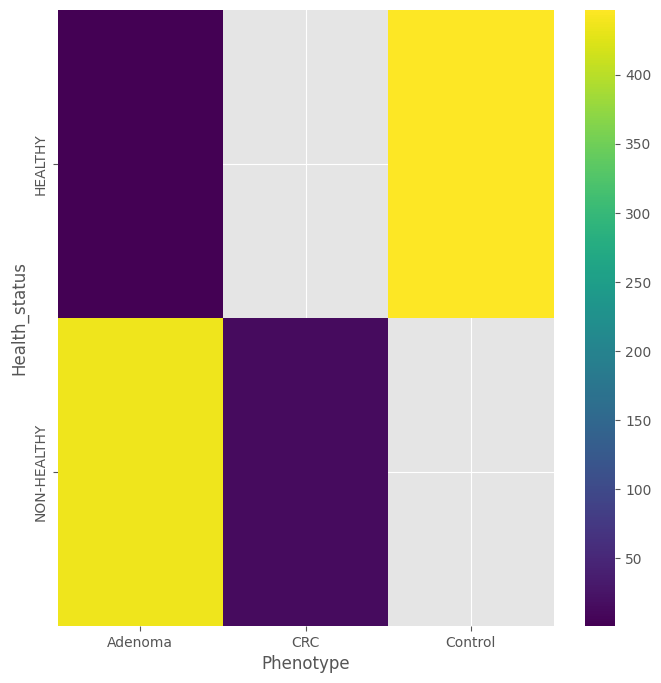

In [86]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Health_status'].value_counts()
    for x_label, grp in metadata_df.groupby('Phenotype')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Phenotype')
_ = plt.ylabel('Health_status')

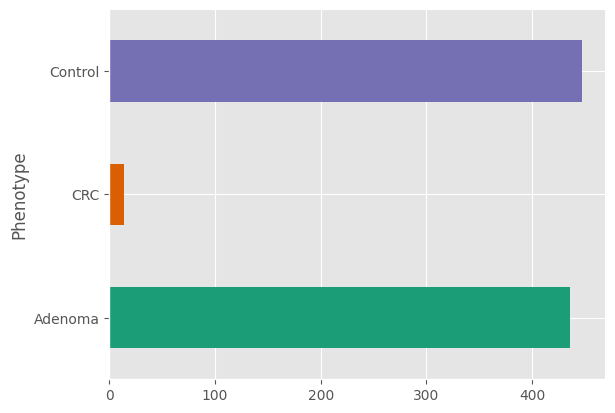

In [87]:
from matplotlib import pyplot as plt
import seaborn as sns
metadata_df.groupby('Phenotype').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [97]:
# Now meerge our clr transformed with otu table with metadata

merged_df = pd.merge(otu_table, metadata_df, left_on='Run_ID', right_on="Run")
merged_df

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,MGYG000004312,Prevotella sp900769055,Run_ID,Run,Age,Sex,BMI,Phenotype,Health_status,Class_Label
0,8.806365,7.471924,7.173744,6.938689,5.543703,5.570383,5.380088,5.130246,5.118385,5.028775,...,-6.182275,-6.182275,SRR32732804,SRR32732804,64,female,25.33,Adenoma,NON-HEALTHY,0
1,6.195401,3.774120,5.520576,5.010633,3.551234,5.181836,4.437172,2.644458,3.991267,2.951804,...,-1.925266,-6.661465,SRR32732805,SRR32732805,72,female,24.85,Adenoma,NON-HEALTHY,0
2,4.837280,3.545734,4.655955,3.367807,2.838800,9.772121,5.695259,1.608967,6.879258,7.053572,...,-0.583914,-6.225821,SRR32732806,SRR32732806,71,female,31.79,Adenoma,NON-HEALTHY,0
3,6.483334,5.106630,9.458928,5.613155,6.301439,4.799325,6.114512,4.828415,6.527403,4.389829,...,-2.971031,-0.420609,SRR32732807,SRR32732807,71,female,21.92,Control,HEALTHY,1
4,7.441161,4.783400,7.346002,5.609086,3.614802,3.126642,5.095710,1.950206,4.405218,2.714155,...,-6.755622,-0.781812,SRR32732808,SRR32732808,59,female,29.53,Adenoma,NON-HEALTHY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,5.152854,3.383767,6.110075,4.235083,4.716748,7.470711,3.182631,6.903389,4.999650,5.055318,...,-3.232730,-2.349229,SRR32733696,SRR32733696,57,female,21.28,Adenoma,NON-HEALTHY,0
847,4.444417,3.122833,1.986398,1.757954,1.401313,7.918664,3.542786,1.053975,4.627155,4.512683,...,-6.579395,-6.579395,SRR32733697,SRR32733697,66,female,23.29,Adenoma,NON-HEALTHY,0
848,4.029992,5.325127,5.259383,3.369916,3.377568,4.235708,2.576141,1.769627,2.613236,2.911147,...,-1.257161,-3.200320,SRR32733698,SRR32733698,63,female,19.76,Control,HEALTHY,1
849,5.135614,5.971271,3.946927,2.720215,3.249386,6.452697,4.166169,1.524065,4.519263,4.044686,...,-1.248524,-0.499978,SRR32733699,SRR32733699,71,female,29.12,Adenoma,NON-HEALTHY,0


In [96]:
# Drop metadata columns, keeping Run_ID and taxa columns
metadata_columns = ['Sex', 'BMI', 'Phenotype','Age', 'Health_status','Run_ID','Run', 'Class_Label']
X = merged_df.drop(columns=metadata_columns)

# Extract the target variable (Class_Label)
y = merged_df['Class_Label']

8

8

In [95]:
y

,Class_Label
0,0
1,0
2,0
3,1
4,0
...,...
846,0
847,0
848,1
849,0


In [90]:
print(y.value_counts())  # 1 for the Healhty and 0 for non-healthy

Class_Label
1    426
0    425
Name: count, dtype: int64


# **MODEL BUILDING**

# **रैंडम फ़ॉरेस्ट क्लासिफायर**
# ⛹


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) # random satate is given to fix our output
print("Training dataset size", X_train.shape)
print("Testing dataset size", X_test.shape)#.shape is an attribute that tells you the dimensions

Training dataset size (765, 2096)
Testing dataset size (86, 2096)


###X-> input   [features](independent variable)
###Y-> output  [target](dependent variable)

In [99]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500,random_state=42)
# n_estimators=500 → The forest will have 500 decision trees. More trees usually improve performance
model.fit(X_train, y_train)#.fit() is the training function-->It tells the model:“Learn the relationship between the input data (X_train) and the target/output (y_train).”


RandomForestClassifier(n_estimators=500, random_state=42)

In [100]:
from sklearn.metrics import accuracy_score, f1_score
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

Accuracy: 0.5116


# **SAVING THE MODEL**

In [101]:
import joblib

# Save the trained model
joblib.dump(model, "my_trained_model.pkl")
print(" Model saved as 'my_trained_model.pkl'")

# Load the saved model
loaded_model = joblib.load("my_trained_model.pkl")
print(" Model loaded successfully!")

# Test loaded model
y_loaded_pred = loaded_model.predict(X_test)
print(f"Accuracy (Loaded Model): {accuracy_score(y_test, y_loaded_pred):.4f}")


 Model saved as 'my_trained_model.pkl'
 Model loaded successfully!
Accuracy (Loaded Model): 0.5116



# 🗂️ Joblib vs Pickle in Python

When working with **Machine Learning models** in Python, we often need to **save** (serialize) and **load** (deserialize) trained models.  
Two popular libraries for this are **Pickle** and **Joblib**.

---

## 1. 🔹 Pickle
- **What it is:**  
  - A built-in Python module used to serialize (convert to byte stream) and deserialize (reconstruct) Python objects.  
  - Works with almost all Python objects.  

- **Usage in ML:**  
  - Can save scikit-learn models, dictionaries, lists, etc.  
  - Best for **general-purpose object serialization**.  


---

## 2. 🔹 Joblib

* **What it is:**

  * A Python library specifically optimized for saving and loading objects containing **large numpy arrays**.
  * More efficient than Pickle when dealing with ML models (because scikit-learn models often contain big numpy arrays).

* **Usage in ML:**

  * Recommended for saving scikit-learn models.
  * Faster and uses less memory compared to Pickle.


---

## 3. ⚖️ Pickle vs Joblib

| Feature                          | Pickle 🥒   | Joblib 📦                         |
| -------------------------------- | ----------- | --------------------------------- |
| **Built-in in Python**           | ✅ Yes       | ❌ No (needs `pip install joblib`) |
| **Handles any object**           | ✅ Yes       | ⚠️ Mostly Python + Numpy objects  |
| **Efficiency with large arrays** | ❌ Slower    | ✅ Faster & memory-efficient       |
| **Recommended for ML models**    | Can be used | ✅ Best choice                     |

---

##  Conclusion

* Use **Pickle** for general Python object serialization.
* Use **Joblib** when working with **scikit-learn models or large numpy arrays**.




In [102]:
print(X.isna().sum().sum())  # Check for NaN in features  (NaN - MISSING VALUES)
print(y.isna().sum())        # Check for NaN in target

0
0


# **EVALUATION OF MODEL**

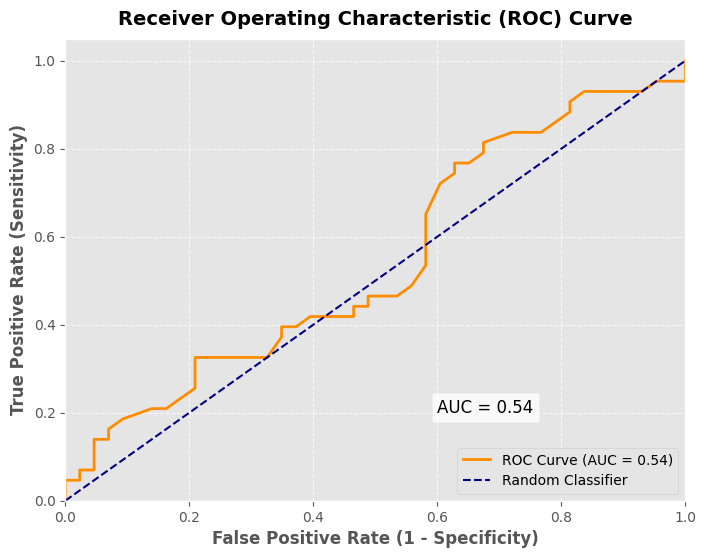

In [105]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Assuming model, X_test, and y_test are already defined
# Get predicted probabilities for the positive class (Class_Label = 1)
y_pred_proba = model.predict_proba(X_test)[:, 1] #gives probabilities for each class (e.g., [P(class=0), P(class=1)]).
                                                 #[:, 1] → selects the probability of positive class (label = 1).
                                                #if output = [0.8, 0.2], it means 80% chance class 0, 20% chance class 1
                                                #fpr = False Positive Rate = proportion of negatives wrongly predicted as positive.
                                                #thresholds = cut-off values used to classify probabilities into 0/1.
                                                #roc_auc = single number summarizing ROC curve performance:

#1.0 → perfect classifier
#0.5 → random guess
#<0.5 → worse than random

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Create a high-quality plot
plt.figure(figsize=(8, 6), dpi=100)  # Set figure size and resolution
plt.style.use('ggplot')  # Use 'ggplot' style for clean aesthetics (alternative to seaborn)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=1.5, label='Random Classifier')  # Diagonal line
plt.xlim([0.0, 1.0])  # Set x-axis limits
plt.ylim([0.0, 1.05])  # Set y-axis limits
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12, weight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12, weight='bold')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, weight='bold', pad=10)
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid for readability
plt.legend(loc='lower right', fontsize=10)  # Place legend in lower-right corner

# Optional: Annotate AUC on the plot
plt.text(0.6, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Save the plot as a high-resolution image
# plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

In [106]:
X_test

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,Streptococcus mutans,CAG-451 sp900760545,MGYG000004829,MGYG000004749,Azonexus sp900549295,Kosakonia cowanii,Leptotrichia wadei,Bruticola sp004554425,MGYG000004312,Prevotella sp900769055
66,5.469599,2.513016,4.140906,2.725478,1.706677,2.885853,4.238959,2.318693,3.639531,7.066465,...,-3.453597,-4.465198,-2.745412,-3.312518,1.243296,-3.859062,-3.453597,-0.799502,-2.646039,-1.297615
316,4.632507,1.810982,4.197989,2.387720,0.215673,1.950683,2.366018,1.716330,2.682494,1.232373,...,0.713193,-2.830590,-3.142965,-4.752403,-1.715849,-3.142965,-3.194258,-0.874281,-2.536829,-3.870014
658,6.682202,4.321714,6.654577,5.084837,4.071168,6.548125,4.724616,2.690726,4.802087,7.445884,...,-0.478265,-1.376028,-3.713014,-3.274759,1.248431,0.390455,-1.904725,-0.742600,-0.779157,-2.008266
797,4.703000,5.564722,3.640151,2.458106,1.701937,4.828164,2.595923,2.438481,2.870350,2.701422,...,-7.117433,-1.620264,-4.172994,-2.502312,0.159815,-0.937416,-3.056990,-1.891686,-1.321375,-4.172994
398,5.188354,4.496674,5.142768,3.513702,3.080526,5.112672,4.039232,4.399096,3.313629,3.092249,...,-3.571254,-2.410121,-1.598069,-2.505431,1.370158,-1.503983,-3.571254,-0.601667,-2.635793,-3.914199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,6.454241,7.703965,7.170764,5.266293,4.569188,7.444231,5.043138,3.275527,5.381528,4.357854,...,-3.525687,-1.536102,-2.309291,-1.139220,-1.287640,0.401225,-1.461994,-0.817637,-1.030417,-0.574690
507,7.429398,6.483324,5.930452,4.903400,4.401541,3.838419,5.496043,4.718527,4.843650,4.044376,...,-6.309582,-6.309582,-1.272629,-2.942286,-2.908385,-2.502920,-6.309582,-6.309582,-2.875595,-1.473300
559,4.697467,2.869946,5.468533,3.673635,4.398718,6.047357,3.234823,1.638712,3.786004,3.480839,...,-3.700648,2.642505,-2.737210,-3.849068,-1.025311,-1.711357,-2.185142,0.127994,-1.863937,-2.750455
576,6.494120,3.412695,6.491844,3.896908,2.837048,2.634652,4.185352,2.727520,3.894096,3.216663,...,-1.572982,-2.018721,-1.849036,-2.812673,-1.521689,-1.246586,-2.976976,-1.400209,-3.364742,-1.356881


              precision  recall  f1-score  support
NON-HEALTHY       0.510   0.605     0.553   43.000
HEALTHY           0.514   0.419     0.462   43.000
accuracy          0.512   0.512     0.512    0.512
macro avg         0.512   0.512     0.507   86.000
weighted avg      0.512   0.512     0.507   86.000

Interpretation:
- Precision: Proportion of predicted positives that are correct.
- Recall: Proportion of actual positives correctly identified.
- F1-Score: Harmonic mean of precision and recall.
- Support: Number of samples for each class.
- NON-HEALTHY (0): 43 samples
- HEALTHY (1): 43 samples
- Accuracy: 0.512 (overall proportion of correct predictions)


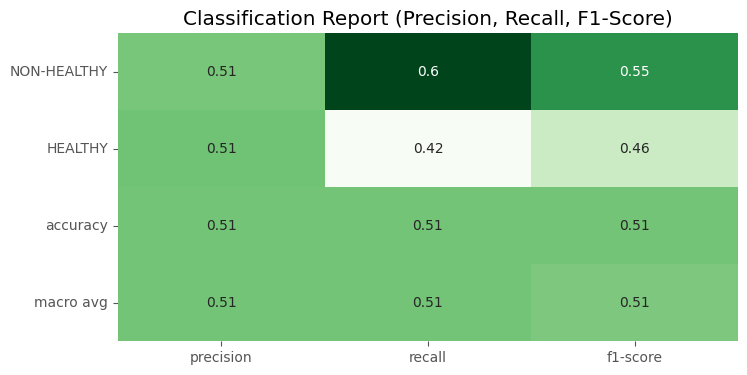

In [107]:
from sklearn.metrics import classification_report
import pandas as pd

# Assuming model, X_test, and y_test are already defined
# Predict on the test set
y_pred = model.predict(X_test) #applies the trained model on the test set to predict class labels (0 or 1)

# Define class names for readability
class_names = {0: 'NON-HEALTHY', 1: 'HEALTHY'}

# Generate classification report with custom class names
report = classification_report(y_test, y_pred, target_names=class_names.values(), output_dict=True)

# Convert report to a DataFrame for better formatting
report_df = pd.DataFrame(report).transpose()

# Round numerical values for clarity
report_df = report_df.round(3)

# Print the classification report
#print("Classification Report:")
print(report_df)

# Brief interpretation for students
print("\nInterpretation:")
print("- Precision: Proportion of predicted positives that are correct.")
print("- Recall: Proportion of actual positives correctly identified.")
print("- F1-Score: Harmonic mean of precision and recall.")
print("- Support: Number of samples for each class.")
print(f"- NON-HEALTHY (0): {int(report_df.loc['NON-HEALTHY', 'support'])} samples")
print(f"- HEALTHY (1): {int(report_df.loc['HEALTHY', 'support'])} samples")
print(f"- Accuracy: {report_df.loc['accuracy', 'precision']:.3f} (overall proportion of correct predictions)")

plt.figure(figsize=(8,4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Greens", cbar=False)
plt.title("Classification Report (Precision, Recall, F1-Score)")
plt.show()



### **1. Macro Average (macro avg)**

* It **treats all classes equally**, regardless of how many samples each class has.
* Formula:

  $$
  \text{Macro Avg} = \frac{\text{Metric for Class 1} + \text{Metric for Class 2} + \dots}{\text{Number of Classes}}
  $$
* Example (from your report, precision):

  * Precision NON-HEALTHY = 0.510
  * Precision HEALTHY = 0.514
  * **Macro Precision = (0.510 + 0.514) / 2 = 0.512**

 Useful when you want to **treat minority and majority classes equally** (balanced perspective).

---

### **2. Weighted Average (weighted avg)**

* It **takes class size (support) into account** when averaging.
* Formula:

  $$
  \text{Weighted Avg} = \frac{\sum (\text{Metric for Class} \times \text{Support for Class})}{\text{Total Samples}}
  $$
* Example (from your report, precision):

  * Both classes have 43 samples each.
  * Weighted precision = $(0.510 \times 43 + 0.514 \times 43) / 86 = 0.512$

 Useful when your dataset is **imbalanced**, because it reflects the real contribution of each class.

---

###  Difference:

* **Macro avg** → Equal weight for each class (good for fairness).
* **Weighted avg** → Weight depends on how many samples are in each class (good for overall performance measure).

 In this case, since both classes have **equal support (43 each)**, **macro avg and weighted avg are the same**.



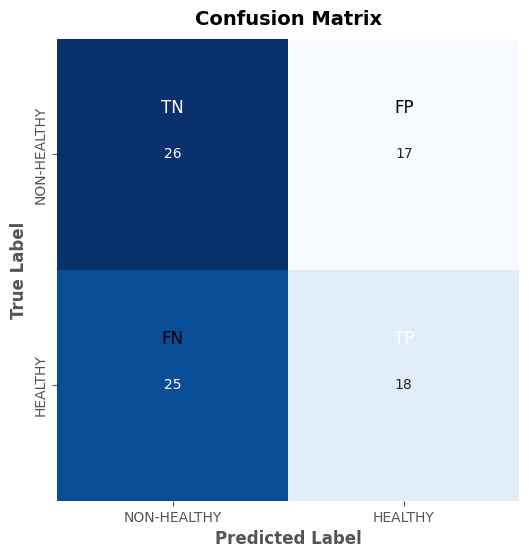

Class_Label
1    43
0    43
Name: count, dtype: int64
Confusion Matrix Interpretation:
- True Negatives (TN): 26 (Correctly predicted NON-HEALTHY)
- False Positives (FP): 17 (NON-HEALTHY predicted as HEALTHY)
- False Negatives (FN): 25 (HEALTHY predicted as NON-HEALTHY)
- True Positives (TP): 18 (Correctly predicted HEALTHY)


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming model, X_test, and y_test are already defined
# Predict on the test set
y_pred = model.predict(X_test)

# Define class names for readability
class_names = ['NON-HEALTHY', 'HEALTHY']

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a high-quality plot
plt.figure(figsize=(6, 6), dpi=100)  # Set figure size and resolution
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar=False, square=True)
plt.xlabel('Predicted Label', fontsize=12, weight='bold')
plt.ylabel('True Label', fontsize=12, weight='bold')
plt.title('Confusion Matrix', fontsize=14, weight='bold', pad=10)

# Annotate TP, TN, FP, FN for clarity
plt.text(0.5, 0.3, 'TN', horizontalalignment='center', verticalalignment='center', fontsize=12, color='white')
plt.text(1.5, 0.3, 'FP', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
plt.text(0.5, 1.3, 'FN', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
plt.text(1.5, 1.3, 'TP', horizontalalignment='center', verticalalignment='center', fontsize=12, color='white')

# Save the plot as a high-resolution image
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print(y_test.value_counts())
# Print interpretation for students
print("Confusion Matrix Interpretation:")
print(f"- True Negatives (TN): {cm[0, 0]} (Correctly predicted NON-HEALTHY)")
print(f"- False Positives (FP): {cm[0, 1]} (NON-HEALTHY predicted as HEALTHY)")
print(f"- False Negatives (FN): {cm[1, 0]} (HEALTHY predicted as NON-HEALTHY)")
print(f"- True Positives (TP): {cm[1, 1]} (Correctly predicted HEALTHY)")

# **सपोर्ट वेक्टर मशीन:-**
# 🐳

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #standardizes features (mean=0, variance=1), important for SVM.

from sklearn.svm import SVC # implementation of Support Vector Machine for classification.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# --- Section 1: Training ---
print("=== Section 1: Training ===")

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', C=0.01, probability=True, random_state=42)
svm_model.fit(X_train, y_train)

import joblib

# Assuming svm_model, X_train, and y_train are already defined
svm_model.fit(X_train, y_train)

# Save the model to a joblib file
joblib.dump(svm_model, 'svm_model.joblib')


=== Section 1: Training ===


['svm_model.joblib']



### 🔹 `kernel='rbf'`

* The **kernel** defines how the input data is transformed into a higher-dimensional space so that the SVM can find a separating boundary.
* `'rbf'` = **Radial Basis Function** (Gaussian kernel).
* It is the most commonly used kernel because it handles **non-linear relationships**.
* Formula:

  $$
  K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2)
  $$

  → Measures similarity between two data points.

 Meaning: The RBF kernel allows the model to create **curved/nonlinear decision boundaries**, unlike linear SVM which only creates straight lines/planes.

---

### 🔹 `C=0.01`

* `C` = **Regularization parameter**.

* It controls the trade-off between **maximizing the margin** (simpler boundary) and **minimizing classification error** (fitting training data).

* **Low C ( 0.01)** →

  * SVM will allow **more misclassifications**.
  * Larger margin, simpler model, less overfitting, but may underfit.

* **High C (100)** →

  * SVM will try to classify all training points correctly.
  * Smaller margin, more complex model, may overfit.


---

### 🔹 `probability=True`

* By default, SVM only outputs **class labels** (0 or 1).
* Setting `probability=True` makes the model also provide **class probabilities** (using Platt scaling, which fits a logistic regression on top of the SVM scores).

 Example: Instead of just predicting `"NON-HEALTHY"`, it can output probabilities like:

* Class 0: 0.80
* Class 1: 0.20

This is **useful for ROC curves, AUC, and probabilistic decisions**.


What happens internally:

1. **Transform data** using the kernel (`rbf` in this case).
2. **Find support vectors** → the most critical data points near the decision boundary.
3. **Optimize margin** → maximize the distance between support vectors of different classes.
4. **Store model** → so you can later call `.predict()` or `.predict_proba()`.

 After this step, the model has **learned the decision boundary** from the training data.

---



# **MODEL EVALUATION**

In [110]:

# --- Section 2: Accuracy ---
print("\n=== Section 2: Accuracy ===")
# Predict on the test set
y_pred = svm_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")


=== Section 2: Accuracy ===
Accuracy: 0.5000



=== Section 3: ROC Curve ===


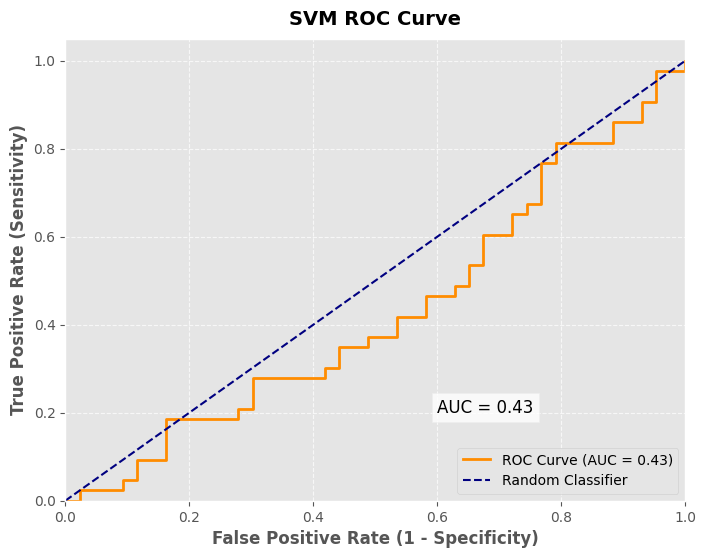

In [38]:

# --- Section 3: ROC Curve ---
print("\n=== Section 3: ROC Curve ===")
# Get predicted probabilities for the positive class (HEALTHY)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Create ROC plot
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=1.5, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12, weight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12, weight='bold')
plt.title('SVM ROC Curve', fontsize=14, weight='bold', pad=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right', fontsize=10)
plt.text(0.6, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
# plt.savefig('svm_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()



In [39]:
# --- Section 4: Classification Report ---
print("\n=== Section 4: Classification Report ===")
# Generate classification report
class_names = {0: 'NON-HEALTHY', 1: 'HEALTHY'} # Define class names as a dictionary
report = classification_report(y_test, y_pred, target_names=class_names.values(), output_dict=True)
report_df = pd.DataFrame(report).transpose().round(3)
print("Classification Report:")
print(report_df)
print("\nInterpretation:")
print("- Precision: Proportion of predicted positives that are correct.")
print("- Recall: Proportion of actual positives correctly identified.")
print("- F1-Score: Harmonic mean of precision and recall.")
print("- Support: Number of samples for each class.")
print(f"- NON-HEALTHY (0): {int(report_df.loc['NON-HEALTHY', 'support'])} samples")
print(f"- HEALTHY (1): {int(report_df.loc['HEALTHY', 'support'])} samples")
print(f"- Accuracy: {report_df.loc['accuracy', 'precision']:.3f}")


=== Section 4: Classification Report ===
Classification Report:
              precision  recall  f1-score  support
NON-HEALTHY        0.00     0.0     0.000     43.0
HEALTHY            0.50     1.0     0.667     43.0
accuracy           0.50     0.5     0.500      0.5
macro avg          0.25     0.5     0.333     86.0
weighted avg       0.25     0.5     0.333     86.0

Interpretation:
- Precision: Proportion of predicted positives that are correct.
- Recall: Proportion of actual positives correctly identified.
- F1-Score: Harmonic mean of precision and recall.
- Support: Number of samples for each class.
- NON-HEALTHY (0): 43 samples
- HEALTHY (1): 43 samples
- Accuracy: 0.500


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Section 5: Confusion Matrix ===


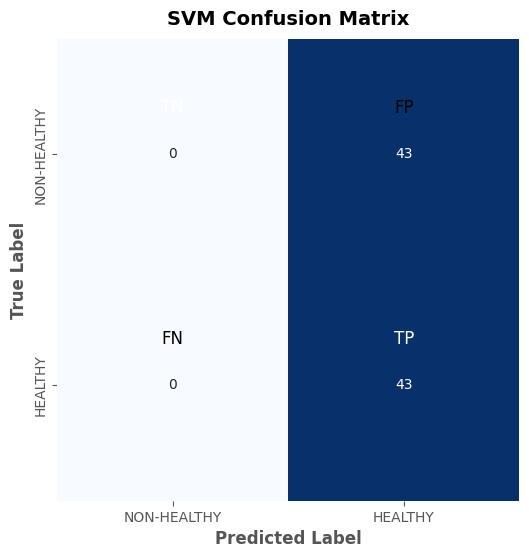

Class_Label
1    43
0    43
Name: count, dtype: int64
Confusion Matrix Interpretation:
- True Negatives (TN): 0 (Correctly predicted NON-HEALTHY)
- False Positives (FP): 43 (NON-HEALTHY predicted as HEALTHY)
- False Negatives (FN): 0 (HEALTHY predicted as NON-HEALTHY)
- True Positives (TP): 43 (Correctly predicted HEALTHY)


In [40]:
# --- Section 5: Confusion Matrix ---
print("\n=== Section 5: Confusion Matrix ===")
# Assuming X (features, taxa columns) and y (Class_Label) are defined
# Define class names for readability
class_names = ['NON-HEALTHY', 'HEALTHY']

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix

plt.figure(figsize=(6, 6), dpi=100)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar=False, square=True)
plt.text(0.5, 0.3, 'TN', horizontalalignment='center', verticalalignment='center', fontsize=12, color='white')
plt.text(1.5, 0.3, 'FP', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
plt.text(0.5, 1.3, 'FN', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
plt.text(1.5, 1.3, 'TP', horizontalalignment='center', verticalalignment='center', fontsize=12, color='white')
plt.xlabel('Predicted Label', fontsize=12, weight='bold')
plt.ylabel('True Label', fontsize=12, weight='bold')
plt.title('SVM Confusion Matrix', fontsize=14, weight='bold', pad=10)
plt.savefig('svm_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print(y_test.value_counts())
# Print confusion matrix interpretation
print("Confusion Matrix Interpretation:")
print(f"- True Negatives (TN): {cm[0, 0]} (Correctly predicted NON-HEALTHY)")
print(f"- False Positives (FP): {cm[0, 1]} (NON-HEALTHY predicted as HEALTHY)")
print(f"- False Negatives (FN): {cm[1, 0]} (HEALTHY predicted as NON-HEALTHY)")
print(f"- True Positives (TP): {cm[1, 1]} (Correctly predicted HEALTHY)")

# **फ़ीचर सलेक्शन**:--
# ⛺

In [41]:
brack_num_df # load the final dataframe

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosakonia cowanii,0,236,0,791,389,94,102,305,371,39,...,1006,370,19,22,278,14,487,313,228,666
Leptotrichia wadei,0,40,201,84,87,25,55,54,89,0,...,309,157,12,35,53,0,146,15,27,178
Bruticola sp004554425,0,238,0,416,279,102,655,340,1418,211,...,40,32,849,0,553,393,225,168,175,156
MGYG000004312,0,113,281,15,0,634,135,273,46,215,...,693,12,82,127,100,30,0,362,157,34


In [111]:
import pandas as pd
import numpy as np


# Step 1: Prevalence Filter (species present in at least 20% of samples)
min_samples = int(0.2 * brack_num_df.shape[1])  # 20% of 851 = 171 samples
non_zero_counts = (brack_num_df > 0).sum(axis=1)  # Count non-zero samples per species
prevalence_filtered_df = brack_num_df[non_zero_counts >= min_samples]
prevalence_filtered_df

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosakonia cowanii,0,236,0,791,389,94,102,305,371,39,...,1006,370,19,22,278,14,487,313,228,666
Leptotrichia wadei,0,40,201,84,87,25,55,54,89,0,...,309,157,12,35,53,0,146,15,27,178
Bruticola sp004554425,0,238,0,416,279,102,655,340,1418,211,...,40,32,849,0,553,393,225,168,175,156
MGYG000004312,0,113,281,15,0,634,135,273,46,215,...,693,12,82,127,100,30,0,362,157,34


In [112]:
non_zero_counts

,0
Bacteroides xylanisolvens,846
Bacteroides finegoldii,849
Bacteroides ovatus,847
Bacteroides sp902362375,846
Bacteroides nordii,847
...,...
Kosakonia cowanii,811
Leptotrichia wadei,776
Bruticola sp004554425,767
MGYG000004312,781


In [113]:
# Step 2: Abundance Filter ( mean relative abundance >= 0.0001)
# Calculate relative abundance (normalize by sample total)
relative_abundance = prevalence_filtered_df.div(prevalence_filtered_df.sum(axis=0), axis=1)#divides each entry in a column by that column’s sum
# Compute mean relative abundance across samples for each species
mean_relative_abundance = relative_abundance.mean(axis=1) #takes the mean across columns (across all samples) for each row (species).
mean_relative_abundance

,0
Bacteroides xylanisolvens,0.012341
Bacteroides finegoldii,0.003372
Bacteroides ovatus,0.016068
Bacteroides sp902362375,0.003865
Bacteroides nordii,0.001303
...,...
Kosakonia cowanii,0.000009
Leptotrichia wadei,0.000002
Bruticola sp004554425,0.000009
MGYG000004312,0.000005


In [114]:
# Filter species with mean relative abundance >= 0.0001
abundance_threshold =0.0001#keeps species whose average relative abundance ≥ 0.0001 across samples
filtered_otu_df = prevalence_filtered_df[mean_relative_abundance >= abundance_threshold]
filtered_otu_df # cutoff value (0.01%) for filtering species.

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Collinsella tanakaei,36,64,171,0,19,119,45464,3494,0,0,...,36,0,112,73,61,35,33,123,27,49
Bifidobacterium infantis,18,2830,38,0,13534,50443,21579,5558,54599,542,...,29020,90956,46,314443,26508,32438,12,5456,10272,186136
UBA7185 sp900556545,96,3257,23401,55,3687,637,418,277,117,96,...,1619,1912,796,669,1591,8064,177,8727,710,108
Prevotella sp900544825,0,49,0,362,130,51,4418203,283294,172,0,...,453,157,1689,0,80,426,99,290,268878,192


####**OTU data is compositional: only relative abundances matter (not absolute counts).**

# **Apply CLR transformation**

In [115]:
import pandas as pd
import numpy as np

# Step 3: Add pseudocount of 1 to handle zeros
otu_df_pseudo = filtered_otu_df + 1

# Step 4: CLR transformation function
def clr_transform(df):
    # Compute geometric mean for each sample (column)
    gm = np.exp(np.log(df).mean(axis=0))
    # Apply CLR: log(x_i / GM)
    clr_df = np.log(df / gm) #Divide each value in a column by that column’s geometric mean.
    return clr_df

#np.log(df) → Take log of all values (since we added pseudocount, no zero issue).

#.mean(axis=0) → Compute mean of log values per column (per sample).

#np.exp(...) → Reverse the log to get the geometric mean.

# Apply CLR transformation
otu_df_clr = clr_transform(otu_df_pseudo)

# Display the resulting CLR-transformed DataFrame
print(otu_df_clr)

# Optional: Save to file
# otu_df_clr.to_csv('OTU_Table_CRC_851_clr_filtered.tsv', sep='\t')

0                          SRR32732804  SRR32732805  SRR32732806  SRR32732807  \
Bacteroides xylanisolvens     7.264509     4.558990     3.285019     4.881701   
Bacteroides finegoldii        5.930067     2.137710     1.993473     3.504997   
Bacteroides ovatus            5.631888     3.884166     3.103694     7.857295   
Bacteroides sp902362375       5.396833     3.374222     1.815546     4.011522   
Bacteroides nordii            4.001847     1.914823     1.286538     4.699806   
...                                ...          ...          ...          ...   
Collinsella tanakaei         -4.113214    -4.123488    -2.630588    -7.345252   
Bifidobacterium infantis     -4.779693    -0.349490    -4.114521    -7.345252   
UBA7185 sp900556545          -3.149421    -0.209007     2.282495    -3.319901   
Prevotella sp900544825       -7.724132    -4.385852    -7.778082    -1.450850   
RC9 sp000434935              -7.724132    -4.513686    -4.410786    -1.788424   

0                          

In [116]:
df_clr=otu_df_clr.T
df_clr

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,Collinsella sp003437035,Collinsella sp900541125,Collinsella sp003479805,MGYG000003108,Collinsella aerofaciens_F,Collinsella tanakaei,Bifidobacterium infantis,UBA7185 sp900556545,Prevotella sp900544825,RC9 sp000434935
0,,,,,,,,,,,,,,,,,,,,,
SRR32732804,7.264509,5.930067,5.631888,5.396833,4.001847,4.028527,3.838231,3.588390,3.576528,3.486918,...,-1.521596,-1.554521,-1.898132,-1.915989,-3.014601,-4.113214,-4.779693,-3.149421,-7.724132,-7.724132
SRR32732805,4.558990,2.137710,3.884166,3.374222,1.914823,3.545425,2.800761,1.008048,2.354856,1.315394,...,0.468831,-1.511158,-2.365630,0.213501,0.112846,-4.123488,-0.349490,-0.209007,-4.385852,-4.513686
SRR32732806,3.285019,1.993473,3.103694,1.815546,1.286538,8.219860,4.142998,0.056706,5.326997,5.501311,...,3.064475,-0.528867,-1.642517,-1.135595,0.986752,-2.630588,-4.114521,2.282495,-7.778082,-4.410786
SRR32732807,4.881701,3.504997,7.857295,4.011522,4.699806,3.197691,4.512879,3.226782,4.925770,2.788195,...,-1.746830,-0.978782,-2.301827,0.585314,-4.254210,-7.345252,-7.345252,-3.319901,-1.450850,-1.788424
SRR32732808,5.852930,3.195170,5.757772,4.020855,2.026572,1.538412,3.507479,0.361976,2.816988,1.125925,...,-1.635768,-2.080454,-2.822391,-1.098911,-2.303598,-5.348120,1.169182,-0.131013,-3.468655,-5.453481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR32733696,3.583510,1.814422,4.540731,2.665739,3.147404,5.901366,1.613286,5.334044,3.430306,3.485973,...,1.090638,0.017166,-3.805245,-1.166188,0.180869,-4.652543,2.151055,0.759227,-2.179278,-2.702672
SRR32733697,2.913627,1.592043,0.455608,0.227164,-0.129477,6.387874,2.011996,-0.476815,3.096365,2.981893,...,-0.269479,-5.337596,-2.911688,-0.731177,-3.728158,-4.583824,-5.545236,-2.928401,-3.505015,-2.895249
SRR32733698,2.467994,3.763129,3.697384,1.807918,1.815570,2.673710,1.014143,0.207629,1.051238,1.349149,...,-1.529691,-0.102878,-0.331501,-0.234694,0.152314,-3.893280,-0.108907,0.360730,-3.040239,5.943111


# **LOading Meta Data**

In [117]:
metadata=pd.read_csv("/content/meta_dta.csv")
metadata['Class_Label'] = metadata['Health_status'].apply(lambda x: 1 if x == 'HEALTHY' else 0)

metadata = metadata.rename(columns={'Unnamed: 0': 'Run'})
print(metadata.head())

           Run  Age     Sex    BMI Phenotype Health_status  Class_Label
0  SRR32732804   64  female  25.33   Adenoma   NON-HEALTHY            0
1  SRR32732805   72  female  24.85   Adenoma   NON-HEALTHY            0
2  SRR32732806   71  female  31.79   Adenoma   NON-HEALTHY            0
3  SRR32732807   71  female  21.92   Control       HEALTHY            1
4  SRR32732808   59  female  29.53   Adenoma   NON-HEALTHY            0


In [118]:
merged_df = pd.merge(df_clr, metadata, left_index=True, right_on="Run")
merged_df

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,UBA7185 sp900556545,Prevotella sp900544825,RC9 sp000434935,Run,Age,Sex,BMI,Phenotype,Health_status,Class_Label
0,7.264509,5.930067,5.631888,5.396833,4.001847,4.028527,3.838231,3.588390,3.576528,3.486918,...,-3.149421,-7.724132,-7.724132,SRR32732804,64,female,25.33,Adenoma,NON-HEALTHY,0
1,4.558990,2.137710,3.884166,3.374222,1.914823,3.545425,2.800761,1.008048,2.354856,1.315394,...,-0.209007,-4.385852,-4.513686,SRR32732805,72,female,24.85,Adenoma,NON-HEALTHY,0
2,3.285019,1.993473,3.103694,1.815546,1.286538,8.219860,4.142998,0.056706,5.326997,5.501311,...,2.282495,-7.778082,-4.410786,SRR32732806,71,female,31.79,Adenoma,NON-HEALTHY,0
3,4.881701,3.504997,7.857295,4.011522,4.699806,3.197691,4.512879,3.226782,4.925770,2.788195,...,-3.319901,-1.450850,-1.788424,SRR32732807,71,female,21.92,Control,HEALTHY,1
4,5.852930,3.195170,5.757772,4.020855,2.026572,1.538412,3.507479,0.361976,2.816988,1.125925,...,-0.131013,-3.468655,-5.453481,SRR32732808,59,female,29.53,Adenoma,NON-HEALTHY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,3.583510,1.814422,4.540731,2.665739,3.147404,5.901366,1.613286,5.334044,3.430306,3.485973,...,0.759227,-2.179278,-2.702672,SRR32733696,57,female,21.28,Adenoma,NON-HEALTHY,0
893,2.913627,1.592043,0.455608,0.227164,-0.129477,6.387874,2.011996,-0.476815,3.096365,2.981893,...,-2.928401,-3.505015,-2.895249,SRR32733697,66,female,23.29,Adenoma,NON-HEALTHY,0
894,2.467994,3.763129,3.697384,1.807918,1.815570,2.673710,1.014143,0.207629,1.051238,1.349149,...,0.360730,-3.040239,5.943111,SRR32733698,63,female,19.76,Control,HEALTHY,1
895,3.514864,4.350522,2.326177,1.099465,1.628636,4.831947,2.545420,-0.096685,2.898513,2.423936,...,-1.365196,4.570148,-4.564573,SRR32733699,71,female,29.12,Adenoma,NON-HEALTHY,0


In [119]:
# Drop metadata columns, keeping Run_ID and taxa columns
metadata_columns = ['Sex', 'BMI', 'Phenotype','Age', 'Health_status','Run', 'Class_Label']
X = merged_df.drop(columns=metadata_columns)

# Extract the target variable (Class_Label)
y = merged_df['Class_Label']



In [120]:
from sklearn.model_selection import train_test_split

# Step 1: Split the data into training and test sets
# Using 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Step 2: Initialize and train the Random Forest classifier

# Initialize and train the Random Forest classifier with optimized parameters
rf_classifier = RandomForestClassifier(
    n_estimators=200,           # More trees for robustness
    max_depth=15,              # Limit depth to prevent overfitting
    min_samples_split=5,       # Minimum samples to split a node
    min_samples_leaf=2,        # Minimum samples in a leaf
    max_features='sqrt',       # Consider sqrt(896) ~ 30 features per split
    random_state=42,           # Reproducibility
    n_jobs=-1                 # Use all CPU cores
)

# Train the model
rf_classifier.fit(X_train, y_train)
# Step 3: Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Test Set Accuracy: 0.5439

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.56      0.55        85
           1       0.55      0.52      0.54        86

    accuracy                           0.54       171
   macro avg       0.54      0.54      0.54       171
weighted avg       0.54      0.54      0.54       171




1. **`n_estimators=200`**

   * Number of decision trees in the forest.
   * More trees = better stability and robustness (lower variance), but more computation.


2. **`max_depth=15`**

   * Maximum depth of each tree.
   * Limits how deep the tree can grow → prevents overfitting by stopping trees from becoming too complex.
   * If not set, trees can grow until all leaves are pure.

3. **`min_samples_split=5`**

   * A node must have **at least 5 samples** before it can be split into child nodes.
   * Larger values reduce overfitting (forcing splits only when enough data is present).

4. **`min_samples_leaf=2`**

   * A leaf node must contain at least 2 samples.
   * Prevents trees from creating leaves with a single sample (which would memorize noise).

5. **`max_features='sqrt'`**

   * At each split, the model considers only a subset of features:

   * This adds randomness and diversity among trees → reduces correlation and improves generalization.

7. **`n_jobs=-1`**

   * Uses all available CPU cores to train the forest in parallel.
   * Speeds up training significantly.


# **LEARNING CURVE**
# ✌

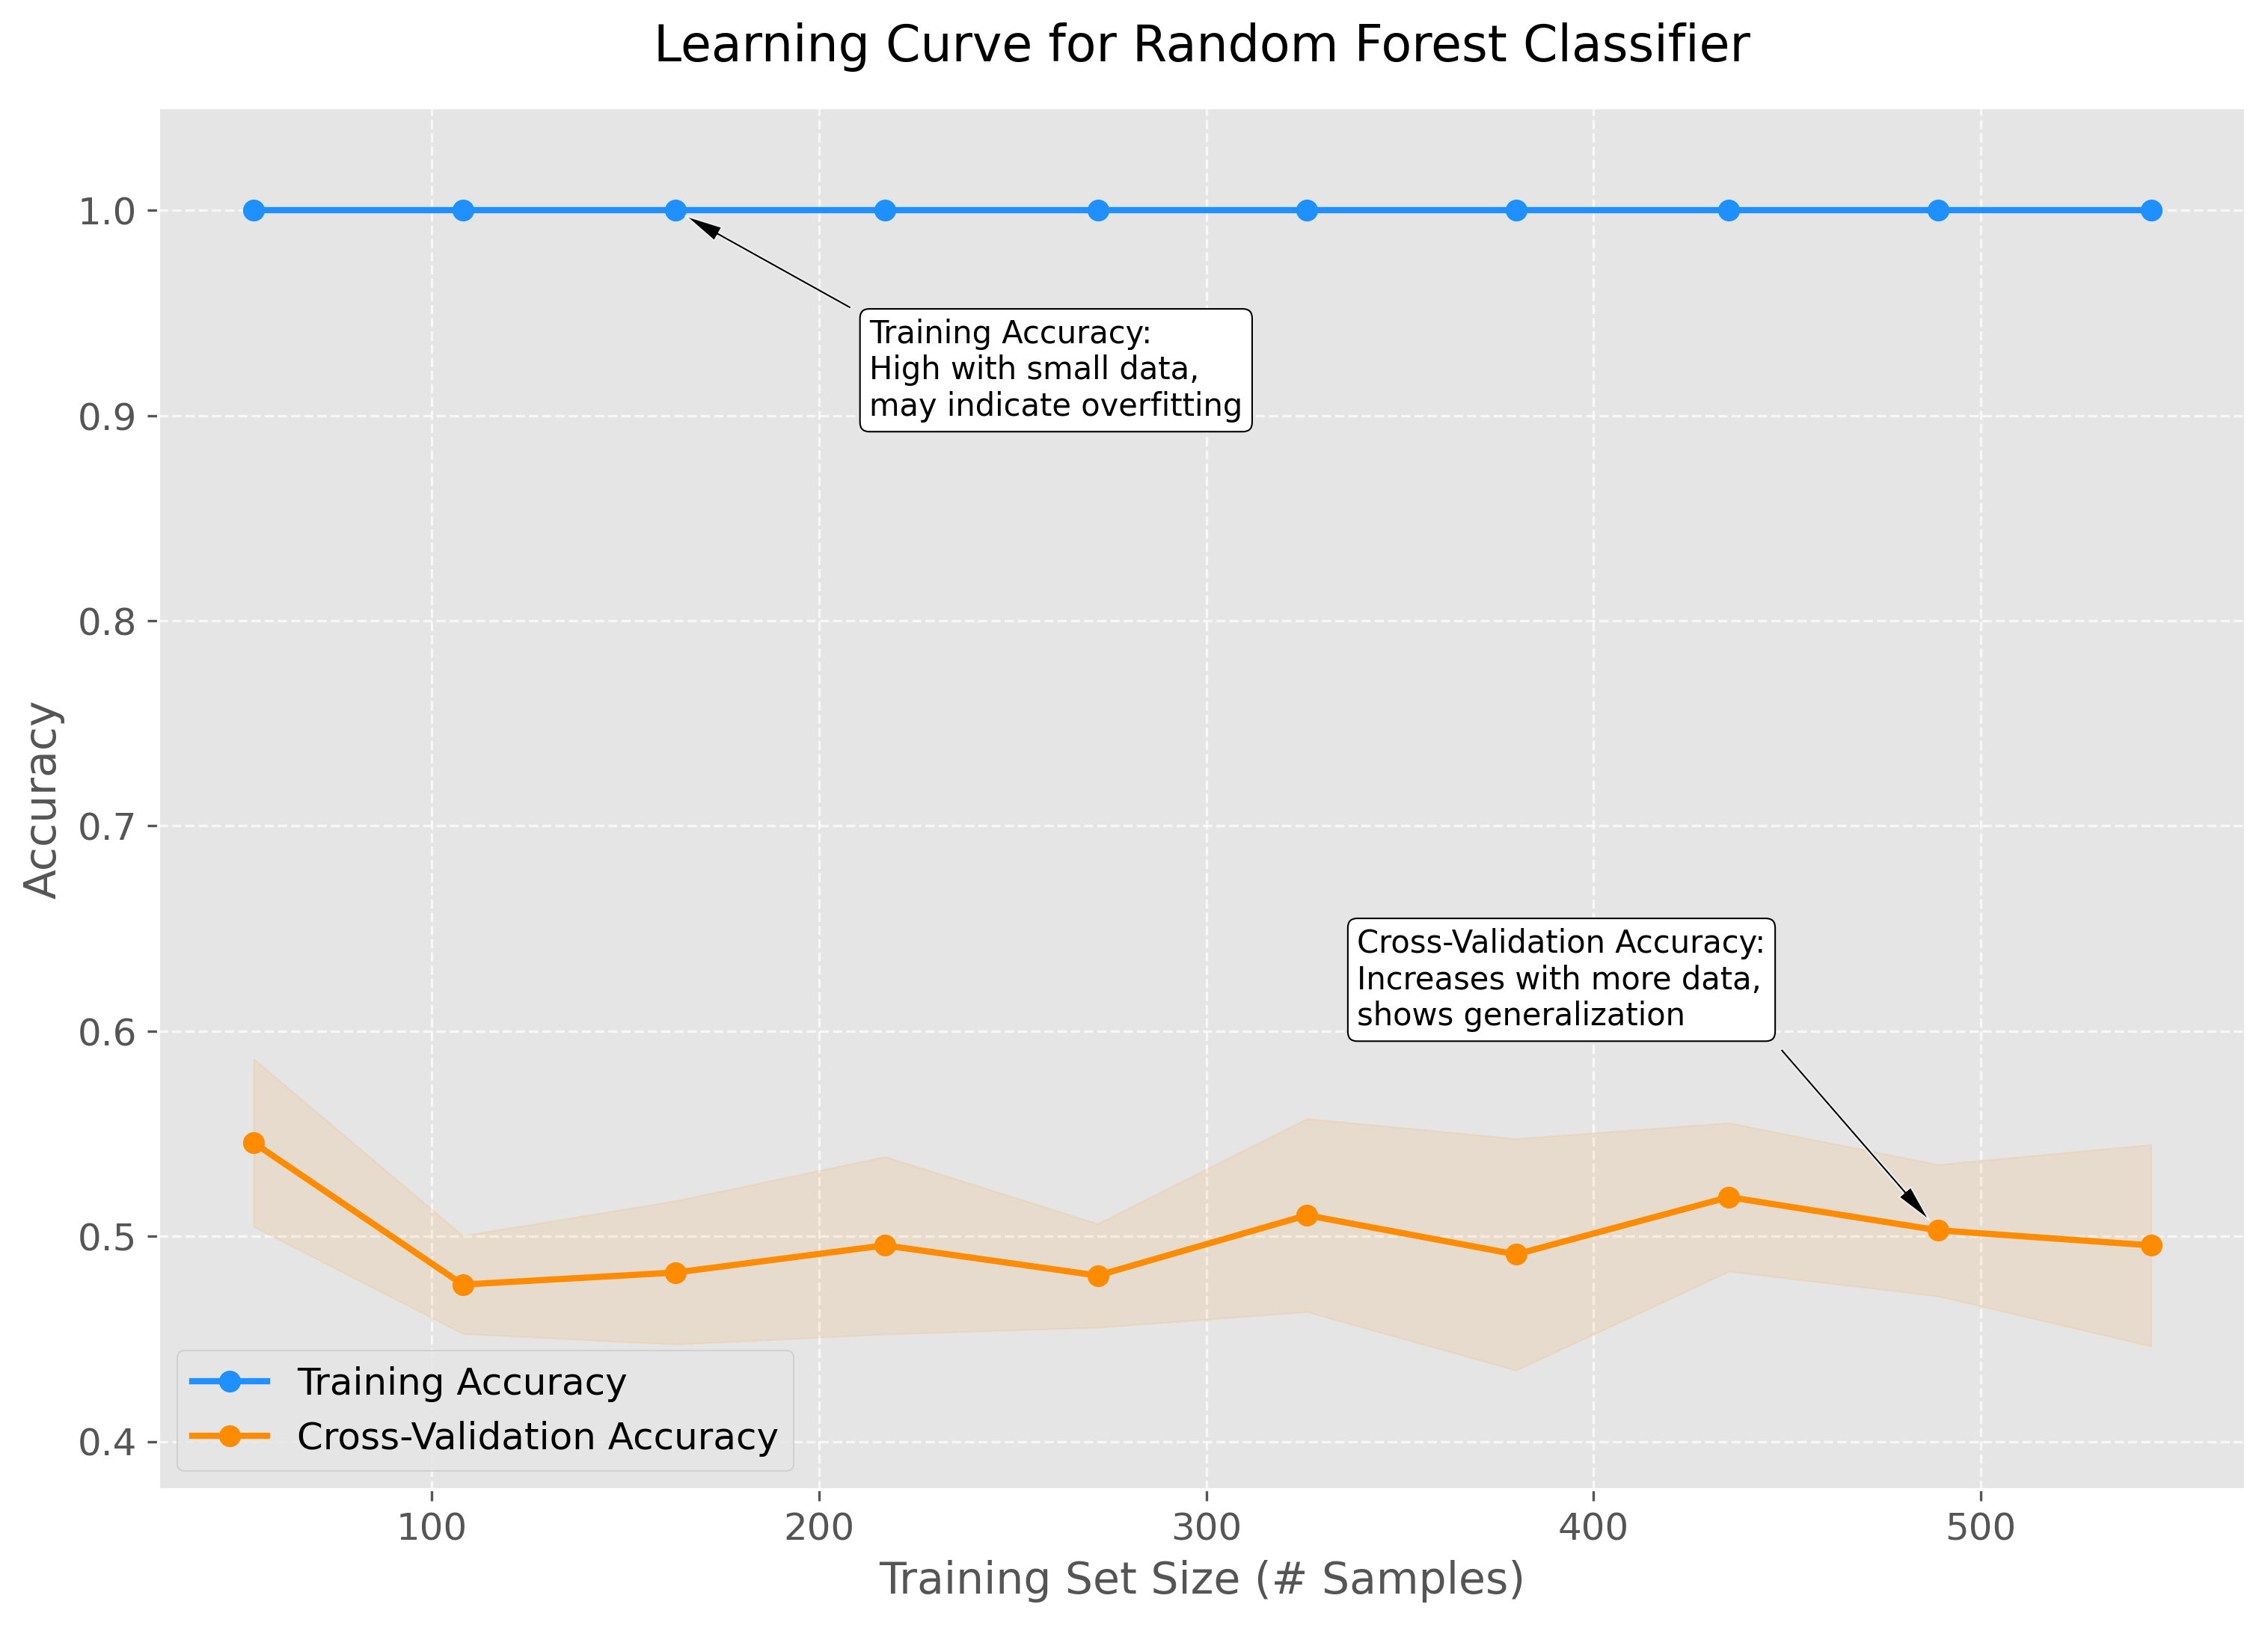

In [122]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define Random Forest with the provided optimized parameters
rf_classifier = RandomForestClassifier(
    n_estimators=200,           # More trees for robustness
    max_depth=15,              # Limit depth to prevent overfitting
    min_samples_split=5,       # Minimum samples to split a node
    min_samples_leaf=2,        # Minimum samples in a leaf
    max_features='sqrt',       # Consider sqrt(896) ~ 30 features per split
    class_weight='balanced',   # Handle potential class imbalance
    random_state=42,           # Reproducibility
    n_jobs=-1                  # Use all CPU cores
)

# Step 2: Generate learning curve data
#This creates 10 evenly spaced values between 0.1 and 1.0.

#Each value represents a fraction of the training data.
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute learning curve scores
train_sizes, train_scores, val_scores = learning_curve(
    rf_classifier,
    X_train,
    y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
) # cv=5 → 5-fold cross-validation at each training size.

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Step 3: Create high-quality learning curve plot
plt.figure(figsize=(12, 8), dpi=300)  # High-resolution figure
plt.plot(train_sizes, train_scores_mean, 'o-', color='dodgerblue', label='Training Accuracy', linewidth=2)
plt.plot(train_sizes, val_scores_mean, 'o-', color='darkorange', label='Cross-Validation Accuracy', linewidth=2)

# Add shaded regions for standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='dodgerblue')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='darkorange')

# Customize plot for clarity and professionalism
plt.xlabel('Training Set Size (# Samples)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Learning Curve for Random Forest Classifier', fontsize=16, pad=15)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add annotations for student explanation
plt.annotate('Training Accuracy:\nHigh with small data,\nmay indicate overfitting',
            xy=(train_sizes[2], train_scores_mean[2]),
            xytext=(train_sizes[2] + 50, train_scores_mean[2] - 0.1),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
            fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.annotate('Cross-Validation Accuracy:\nIncreases with more data,\nshows generalization',
            xy=(train_sizes[-2], val_scores_mean[-2]),
            xytext=(train_sizes[-2] - 150, val_scores_mean[-2] + 0.1),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
            fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Set y-axis limits for clarity
plt.ylim(min(min(train_scores_mean), min(val_scores_mean)) - 0.1, 1.05)

# Save plot as high-quality image
plt.savefig('rf_learning_curve_high_quality.png', dpi=300, bbox_inches='tight')
plt.show()


---

# 📘 K-Fold Cross Validation

## 🔹 What is Cross Validation?

Cross-validation is a resampling technique used to evaluate machine learning models.
Instead of splitting the dataset into just **one training set** and **one test set**, cross-validation divides the data into multiple parts (called **folds**) and tests the model’s performance on each part.

---

## 🔹 K-Fold Cross Validation

In **K-Fold Cross Validation**:

1. The dataset is split into **K equal folds**.
2. The model is trained on **K-1 folds** and validated on the **remaining fold**.
3. This process is repeated **K times**, each time using a different fold as the validation set.
4. The results (accuracy, F1-score, etc.) from each fold are averaged to get the final performance score.

---

## 🔹 Example: 5-Fold Cross Validation

If `K = 5`:

* The dataset is divided into **5 folds**.
* The model trains 5 times:

  * **Iteration 1:** Train on folds 2–5, test on fold 1
  * **Iteration 2:** Train on folds 1, 3–5, test on fold 2
  * **Iteration 3:** Train on folds 1–2, 4–5, test on fold 3
  * **Iteration 4:** Train on folds 1–3, 5, test on fold 4
  * **Iteration 5:** Train on folds 1–4, test on fold 5
* Final performance = **average of all 5 test scores**.

---

## 🔹 Advantages

1) Uses **all data** for both training and validation
2) Reduces bias and variance in performance estimation
3) More reliable than a simple train-test split

---

## 🔹 Visual Representation

```
Iteration 1: [Test] [Train] [Train] [Train] [Train]  
Iteration 2: [Train] [Test] [Train] [Train] [Train]  
Iteration 3: [Train] [Train] [Test] [Train] [Train]  
Iteration 4: [Train] [Train] [Train] [Test] [Train]  
Iteration 5: [Train] [Train] [Train] [Train] [Test]  
```




In [123]:
# Optional: Feature importance
# Fit the classifier again before accessing feature_importances_
rf_classifier.fit(X_train, y_train)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)

                          Feature  Importance
207  Ruthenibacterium sp900546885    0.003854
637           CAG-127 sp900553925    0.003636
546           UBA9502 sp900538475    0.003364
491           TF01-11 sp003529475    0.003298
436                 MGYG000003822    0.003254
..                            ...         ...
549      Anaerostipes sp900756035    0.000441
295                 MGYG000003910    0.000420
481           Blautia sp900539145    0.000393
426              Blautia_A faecis    0.000337
251           UBA1417 sp900552925    0.000336

[768 rows x 2 columns]


```**
rf_classifier.feature_importances is an attribute of a trained Random Forest.

It tells you how important each feature was in making predictions.

Importance is calculated by how much each feature reduces impurity (e.g., Gini impurity or entropy) across all the trees.

Larger values = the feature had more influence in splitting the data and reducing uncertainty.

In [124]:
feat=feature_importance[feature_importance["Importance"]>0]
len(feat)

768

In [125]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Filter features with importance > 0
important_features = feature_importance[feature_importance['Importance'] > 0]['Feature'].tolist()
print(f"\nNumber of features with importance > 0: {len(important_features)}")

# Step 3: Subset X_train and X_test to include only important features
X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]

# Step 4: Retrain Random Forest with optimized parameters on filtered features
rf_classifier_filtered = RandomForestClassifier(
    n_estimators=200,           # More trees for robustness
    max_depth=15,              # Limit depth to prevent overfitting
    min_samples_split=5,       # Minimum samples to split a node
    min_samples_leaf=2,        # Minimum samples in a leaf
    max_features='sqrt',       # Consider sqrt(number of important features) per split
    class_weight='balanced',   # Handle potential class imbalance
    random_state=42,           # Reproducibility
    n_jobs=-1                  # Use all CPU cores
)

# Train the model on filtered features
rf_classifier_filtered.fit(X_train_filtered, y_train)

# Step 5: Predict on the test set
y_pred_filtered = rf_classifier_filtered.predict(X_test_filtered)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_filtered)
print(f"\nTest Set Accuracy (Filtered Features): {accuracy:.4f}")
print("\nClassification Report (Filtered Features):")
print(classification_report(y_test, y_pred_filtered))



Number of features with importance > 0: 768

Test Set Accuracy (Filtered Features): 0.5205

Classification Report (Filtered Features):
              precision    recall  f1-score   support

           0       0.52      0.54      0.53        85
           1       0.52      0.50      0.51        86

    accuracy                           0.52       171
   macro avg       0.52      0.52      0.52       171
weighted avg       0.52      0.52      0.52       171



# **Feature selection with Lasso (L1 regularization)**


# ✈

In [126]:
rf_classifier_filtered.fit(X_train_filtered, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [128]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV #tunes hyperparameters with cross-validation.
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report


# Step 1: Lasso Feature Selection with Cross-Validation
# Define LogisticRegression with L1 penalty
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
# Logistic Regression classifier with L1 penalty → performs Lasso feature selection.

# penalty='l1': adds L1 regularization, which can shrink some coefficients to zero → removes less important features.
# solver='liblinear': required for L1 penalty.
# max_iter=1000: allows more iterations for convergence.

# C is a hyperparameter in Logistic Regression (or Lasso with logistic loss) that controls regularization strength.

# Define parameter grid for C (inverse of regularization strength)
param_grid = {'C': np.logspace(-4, 2, 10)}  # Range from 0.0001 to 100
# creates 10 values logarithmically spaced between 10^-4 (0.0001) and 10^2 (100).

# C = inverse of regularization strength in Logistic Regression.
# Small C → strong regularization → more coefficients shrink to zero (fewer features kept).
# Large C → weak regularization → more coefficients remain (more features kept).

# Perform GridSearchCV to find the best C
lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lasso_cv.fit(X_train, y_train)

#Runs GridSearchCV to test each value of C from the grid.
#cv=5: Uses 5-fold cross-validation for each C.
#scoring='accuracy': Chooses the best model based on validation accuracy.

# Get the best Lasso model
best_lasso = lasso_cv.best_estimator_     #Retrieves the Logistic Regression model trained with the best C.

print(f"Best Lasso C: {lasso_cv.best_params_['C']}")#Prints the optimal C chosen by cross-validation.

# Select features with non-zero coefficients
selector = SelectFromModel(best_lasso, prefit=True)
X_train_lasso = selector.transform(X_train)
X_test_lasso = selector.transform(X_test)

# Get the selected feature names
selected_features = X_train.columns[selector.get_support()].tolist()
print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features: {selected_features}")



Best Lasso C: 0.0001
Number of selected features: 0
Selected features: []


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_base.py:122: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_base.py:122: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


In [129]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, accuracy_score

# Example: train_test_split (if not already done)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 1: Logistic Regression with L1 penalty (Lasso)
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000, random_state=42)

# Step 2: Define wider parameter grid for C
param_grid = {'C': np.logspace(-4, 4, 20)}  # from 0.0001 to 10000

# Step 3: Perform GridSearchCV
lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='f1', n_jobs=-1)  # use F1 for imbalanced data
lasso_cv.fit(X_train, y_train)

# Step 4: Get the best model
best_lasso = lasso_cv.best_estimator_
print(f"Best Lasso C: {lasso_cv.best_params_['C']}")#After running GridSearchCV, this stores the model trained with the best C value

# Step 5: Select features (allow small threshold, not only strictly nonzero)
selector = SelectFromModel(best_lasso, prefit=True, threshold="mean")

# SelectFromModel-->A utility in scikit-learn to select important features based on a trained model’s coefficients.
# Works well with models that perform feature selection inherently, like Lasso (L1 regularization).

# best_lasso → the trained Lasso model is used to determine feature importance.
# prefit=True → indicates that the model is already trained.
# threshold="mean" → selects features whose absolute coefficient is above the mean of all

# Transform train and test sets
X_train_lasso = selector.transform(X_train)
#selector = the SelectFromModel object we created earlier using best_lasso..transform(X) takes the original dataset and keeps only the selected features.
X_test_lasso = selector.transform(X_test)

# Step 6: Get selected feature names
selected_features = X_train.columns[selector.get_support()].tolist()
print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features: {selected_features}")

Best Lasso C: 0.03359818286283781
Number of selected features: 40
Selected features: ['Bacteroides fragilis', 'Bacteroides intestinalis', 'Phocaeicola mediterraneensis', 'Prevotella sp003447235', 'CAG-617 sp000431275', 'Alistipes putredinis', 'Alistipes finegoldii', 'Alistipes_A indistinctus', 'Barnesiella intestinihominis', 'Odoribacter laneus', 'Butyricimonas virosa', 'MGYG000000512', 'Ruthenibacterium sp900546885', 'Ruminococcus_E bromii_B', 'UBA1417 sp003531055', 'Eubacterium_R sp000436835', 'Eubacterium_R sp000434995', 'CAG-217 sp000436335', 'MGYG000003211', 'CAG-180 sp000432435', 'CAG-177 sp003514385', 'Intestinimonas massiliensis', 'Intestinimonas butyriciproducens', 'Blautia_A caecimuris', 'Blautia_A obeum', 'Anaerobutyricum hallii', 'Enterocloster sp001517625', 'Clostridium_Q sp000435655', 'UBA9502 sp900540335', 'UBA11774 sp003507655', 'Eubacterium_G ventriosum', 'GCA-900066135 sp900543575', 'CAG-145 sp900545135', 'UBA1191 sp900549125', 'CAG-354 sp900552655', 'QALS01 sp9005526

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [130]:
selected_features

['Bacteroides fragilis',
 'Bacteroides intestinalis',
 'Phocaeicola mediterraneensis',
 'Prevotella sp003447235',
 'CAG-617 sp000431275',
 'Alistipes putredinis',
 'Alistipes finegoldii',
 'Alistipes_A indistinctus',
 'Barnesiella intestinihominis',
 'Odoribacter laneus',
 'Butyricimonas virosa',
 'MGYG000000512',
 'Ruthenibacterium sp900546885',
 'Ruminococcus_E bromii_B',
 'UBA1417 sp003531055',
 'Eubacterium_R sp000436835',
 'Eubacterium_R sp000434995',
 'CAG-217 sp000436335',
 'MGYG000003211',
 'CAG-180 sp000432435',
 'CAG-177 sp003514385',
 'Intestinimonas massiliensis',
 'Intestinimonas butyriciproducens',
 'Blautia_A caecimuris',
 'Blautia_A obeum',
 'Anaerobutyricum hallii',
 'Enterocloster sp001517625',
 'Clostridium_Q sp000435655',
 'UBA9502 sp900540335',
 'UBA11774 sp003507655',
 'Eubacterium_G ventriosum',
 'GCA-900066135 sp900543575',
 'CAG-145 sp900545135',
 'UBA1191 sp900549125',
 'CAG-354 sp900552655',
 'QALS01 sp900552625',
 'Veillonella atypica',
 'Holdemanella sp0022

In [131]:
# Convert transformed arrays back to DataFrames for compatibility with Random Forest
X_train_lasso = pd.DataFrame(X_train_lasso, columns=selected_features, index=X_train.index)
X_test_lasso = pd.DataFrame(X_test_lasso, columns=selected_features, index=X_test.index)

# Step 2: Train Random Forest on Lasso-selected features
rf_classifier_lasso = RandomForestClassifier(
    n_estimators=200,           # More trees for robustness
    max_depth=15,              # Limit depth to prevent overfitting
    min_samples_split=5,       # Minimum samples to split a node
    min_samples_leaf=2,        # Minimum samples in a leaf
    max_features='sqrt',       # Consider sqrt(number of selected features) per split
    class_weight='balanced',   # Handle potential class imbalance
    random_state=42,           # Reproducibility
    n_jobs=-1                  # Use all CPU cores
)

# Train the model
rf_classifier_lasso.fit(X_train_lasso, y_train)

# Step 3: Predict on the test set
y_pred_lasso = rf_classifier_lasso.predict(X_test_lasso)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lasso)
print(f"\nTest Set Accuracy (Lasso-selected Features): {accuracy:.4f}")
print("\nClassification Report (Lasso-selected Features):")
print(classification_report(y_test, y_pred_lasso))




Test Set Accuracy (Lasso-selected Features): 0.4971

Classification Report (Lasso-selected Features):
              precision    recall  f1-score   support

           0       0.49      0.51      0.50        85
           1       0.50      0.49      0.49        86

    accuracy                           0.50       171
   macro avg       0.50      0.50      0.50       171
weighted avg       0.50      0.50      0.50       171



#  **FOR SVM**
# 👽

In [132]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Define SVM with GridSearchCV for hyperparameter tuning
svm = SVC(class_weight='balanced', random_state=42)

# Define parameter grid for C and gamma
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'gamma': ['scale', 0.001, 0.1],  # Kernel coefficient for RBF
    'kernel': ['rbf']            # Use RBF kernel
}

svm_cv = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_cv.fit(X_train, y_train)

best_svm = svm_cv.best_estimator_
print(f"Best SVM Parameters: {svm_cv.best_params_}")

best_svm.fit(X_train, y_train)

y_pred_svm = best_svm.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"\nTest Set Accuracy (SVM): {accuracy:.4f}")
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

Test Set Accuracy (SVM): 0.5673

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        85
           1       0.57      0.60      0.58        86

    accuracy                           0.57       171
   macro avg       0.57      0.57      0.57       171
weighted avg       0.57      0.57      0.57       171



**C controls the trade-off between margin size and classification error:**

Small C : Higher regularization → wider margin → allows more misclassifications but may generalize better.

Large C : Lower regularization → narrower margin → tries to classify all training points correctly, but may overfit.


**gamma defines how far the influence of a single training point reaches:**

Small gamma : Each point has a wide influence → smoother decision boundary → may underfit.

Large gamma : Each point has very local influence → more complex, wiggly decision boundary → may overfit.



# **XGBoost**
# ⛽

In [63]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Define XGBoost model with fixed hyperparameters
xgb = XGBClassifier(
    n_estimators=200,       # Number of boosting rounds (trees)
    max_depth=5,            # Maximum depth of trees
    learning_rate=0.1,      # Step size shrinkage used in each boosting step. Smaller values slow down learning but improve generalization.
    subsample=0.8,          # Fraction of training samples used to grow each tree (helps prevent overfitting).
    colsample_bytree=0.8,   # Fraction of features (columns) used for each tree. Encourages diversity among trees.
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
# Evaluation metric: logarithmic loss, suitable for classification problems.
#use_label_encoder=False -->Disables the deprecated XGBoost label encoder (avoids warnings in new versions)

# Step 2: Train the model
xgb.fit(X_train, y_train)

# Step 3: Predictions
y_pred_xgb = xgb.predict(X_test)

# Step 4: Evaluate
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"\nTest Set Accuracy (XGBoost): {accuracy:.4f}")

print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:44:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Test Set Accuracy (XGBoost): 0.4971

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.49      0.49      0.49        85
           1       0.50      0.50      0.50        86

    accuracy                           0.50       171
   macro avg       0.50      0.50      0.50       171
weighted avg       0.50      0.50      0.50       171



# **DecisionTreeClassifieR**
# 📬

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Define Decision Tree model with fixed hyperparameters   # This defines how the decision tree measures the quality of a split
dt = DecisionTreeClassifier(
    criterion="gini",   # "gini" → uses the Gini Impurity (default). Lower values mean purer nodes.  & "entropy" → uses Information Gain (from Shannon’s entropy).
    max_depth=5,        # limit tree depth to avoid overfitting
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)



# Step 2: Train the model
dt.fit(X_train, y_train)

# Step 3: Predictions
y_pred_dt = dt.predict(X_test)

# Step 4: Evaluate
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"\nTest Set Accuracy (Decision Tree): {accuracy:.4f}")

print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))



Test Set Accuracy (Decision Tree): 0.5439

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.54      0.53      0.54        85
           1       0.55      0.56      0.55        86

    accuracy                           0.54       171
   macro avg       0.54      0.54      0.54       171
weighted avg       0.54      0.54      0.54       171



# **LogisticRegression**
# **🚢**

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Define Logistic Regression model with L2 penalty
log_reg = LogisticRegression(
    penalty="l2",          # L2 regularization
    solver="lbfgs",        # lbfgs handles L2 well
    C=1.0,                 # Inverse of regularization strength (smaller = stronger regularization)
    max_iter=1000,         # Increase iterations to ensure convergence
    class_weight="balanced", # Handle imbalanced datasets
    random_state=42
)

# Step 2: Train the model
log_reg.fit(X_train, y_train)

# Step 3: Predictions
y_pred_lr = log_reg.predict(X_test)

# Step 4: Evaluate
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"\nTest Set Accuracy (Logistic Regression): {accuracy:.4f}")

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))



Test Set Accuracy (Logistic Regression): 0.4737

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.47      0.52      0.49        85
           1       0.47      0.43      0.45        86

    accuracy                           0.47       171
   macro avg       0.47      0.47      0.47       171
weighted avg       0.47      0.47      0.47       171



In [66]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


# Step 1: Define SVM with GridSearchCV for hyperparameter tuning
svm = SVC(class_weight='balanced', random_state=42)

# Define parameter grid for C and gamma
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'gamma': ['scale', 0.001, 0.1],  # Kernel coefficient for RBF
    'kernel': ['rbf']            # Use RBF kernel
}

# Perform GridSearchCV to find the best parameters
svm_cv = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_cv.fit(X_train_lasso, y_train)

# Get the best SVM model
best_svm = svm_cv.best_estimator_
print(f"Best SVM Parameters: {svm_cv.best_params_}")

# Step 2: Train the best SVM model on Lasso-selected features
best_svm.fit(X_train_lasso, y_train)

# Step 3: Predict on the test set
y_pred_svm = best_svm.predict(X_test_lasso)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"\nTest Set Accuracy (SVM with Lasso-selected Features): {accuracy:.4f}")
print("\nClassification Report (SVM with Lasso-selected Features):")
print(classification_report(y_test, y_pred_svm))

Best SVM Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Test Set Accuracy (SVM with Lasso-selected Features): 0.4269

Classification Report (SVM with Lasso-selected Features):
              precision    recall  f1-score   support

           0       0.42      0.39      0.40        85
           1       0.43      0.47      0.45        86

    accuracy                           0.43       171
   macro avg       0.43      0.43      0.43       171
weighted avg       0.43      0.43      0.43       171



In [67]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Hyperparameter tuning with GridSearchCV
svm = SVC(class_weight='balanced', random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

# Perform GridSearchCV to find the best parameters
svm_cv = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_cv.fit(X_train, y_train)

# Print best parameters and cross-validation accuracy
print(f"Best SVM Parameters: {svm_cv.best_params_}")
print(f"Best Cross-Validation Accuracy (GridSearchCV): {svm_cv.best_score_:.4f}")



Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy (GridSearchCV): 0.5206


In [68]:
# Step 2: Cross-validation with the best model
best_svm = svm_cv.best_estimator_
cv_scores = cross_val_score(best_svm, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)
print(f"\nCross-Validation Accuracy (Best SVM): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Optional: Train best model on full training set and evaluate on test set
best_svm.fit(X_train, y_train)
y_pred_svm = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"\nTest Set Accuracy (Best SVM): {accuracy:.4f}")
print("\nClassification Report (Best SVM on Test Set):")
print(classification_report(y_test, y_pred_svm))


Cross-Validation Accuracy (Best SVM): 0.5147 ± 0.0474

Test Set Accuracy (Best SVM): 0.5673

Classification Report (Best SVM on Test Set):
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        85
           1       0.57      0.60      0.58        86

    accuracy                           0.57       171
   macro avg       0.57      0.57      0.57       171
weighted avg       0.57      0.57      0.57       171



Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy (GridSearchCV): 0.5206


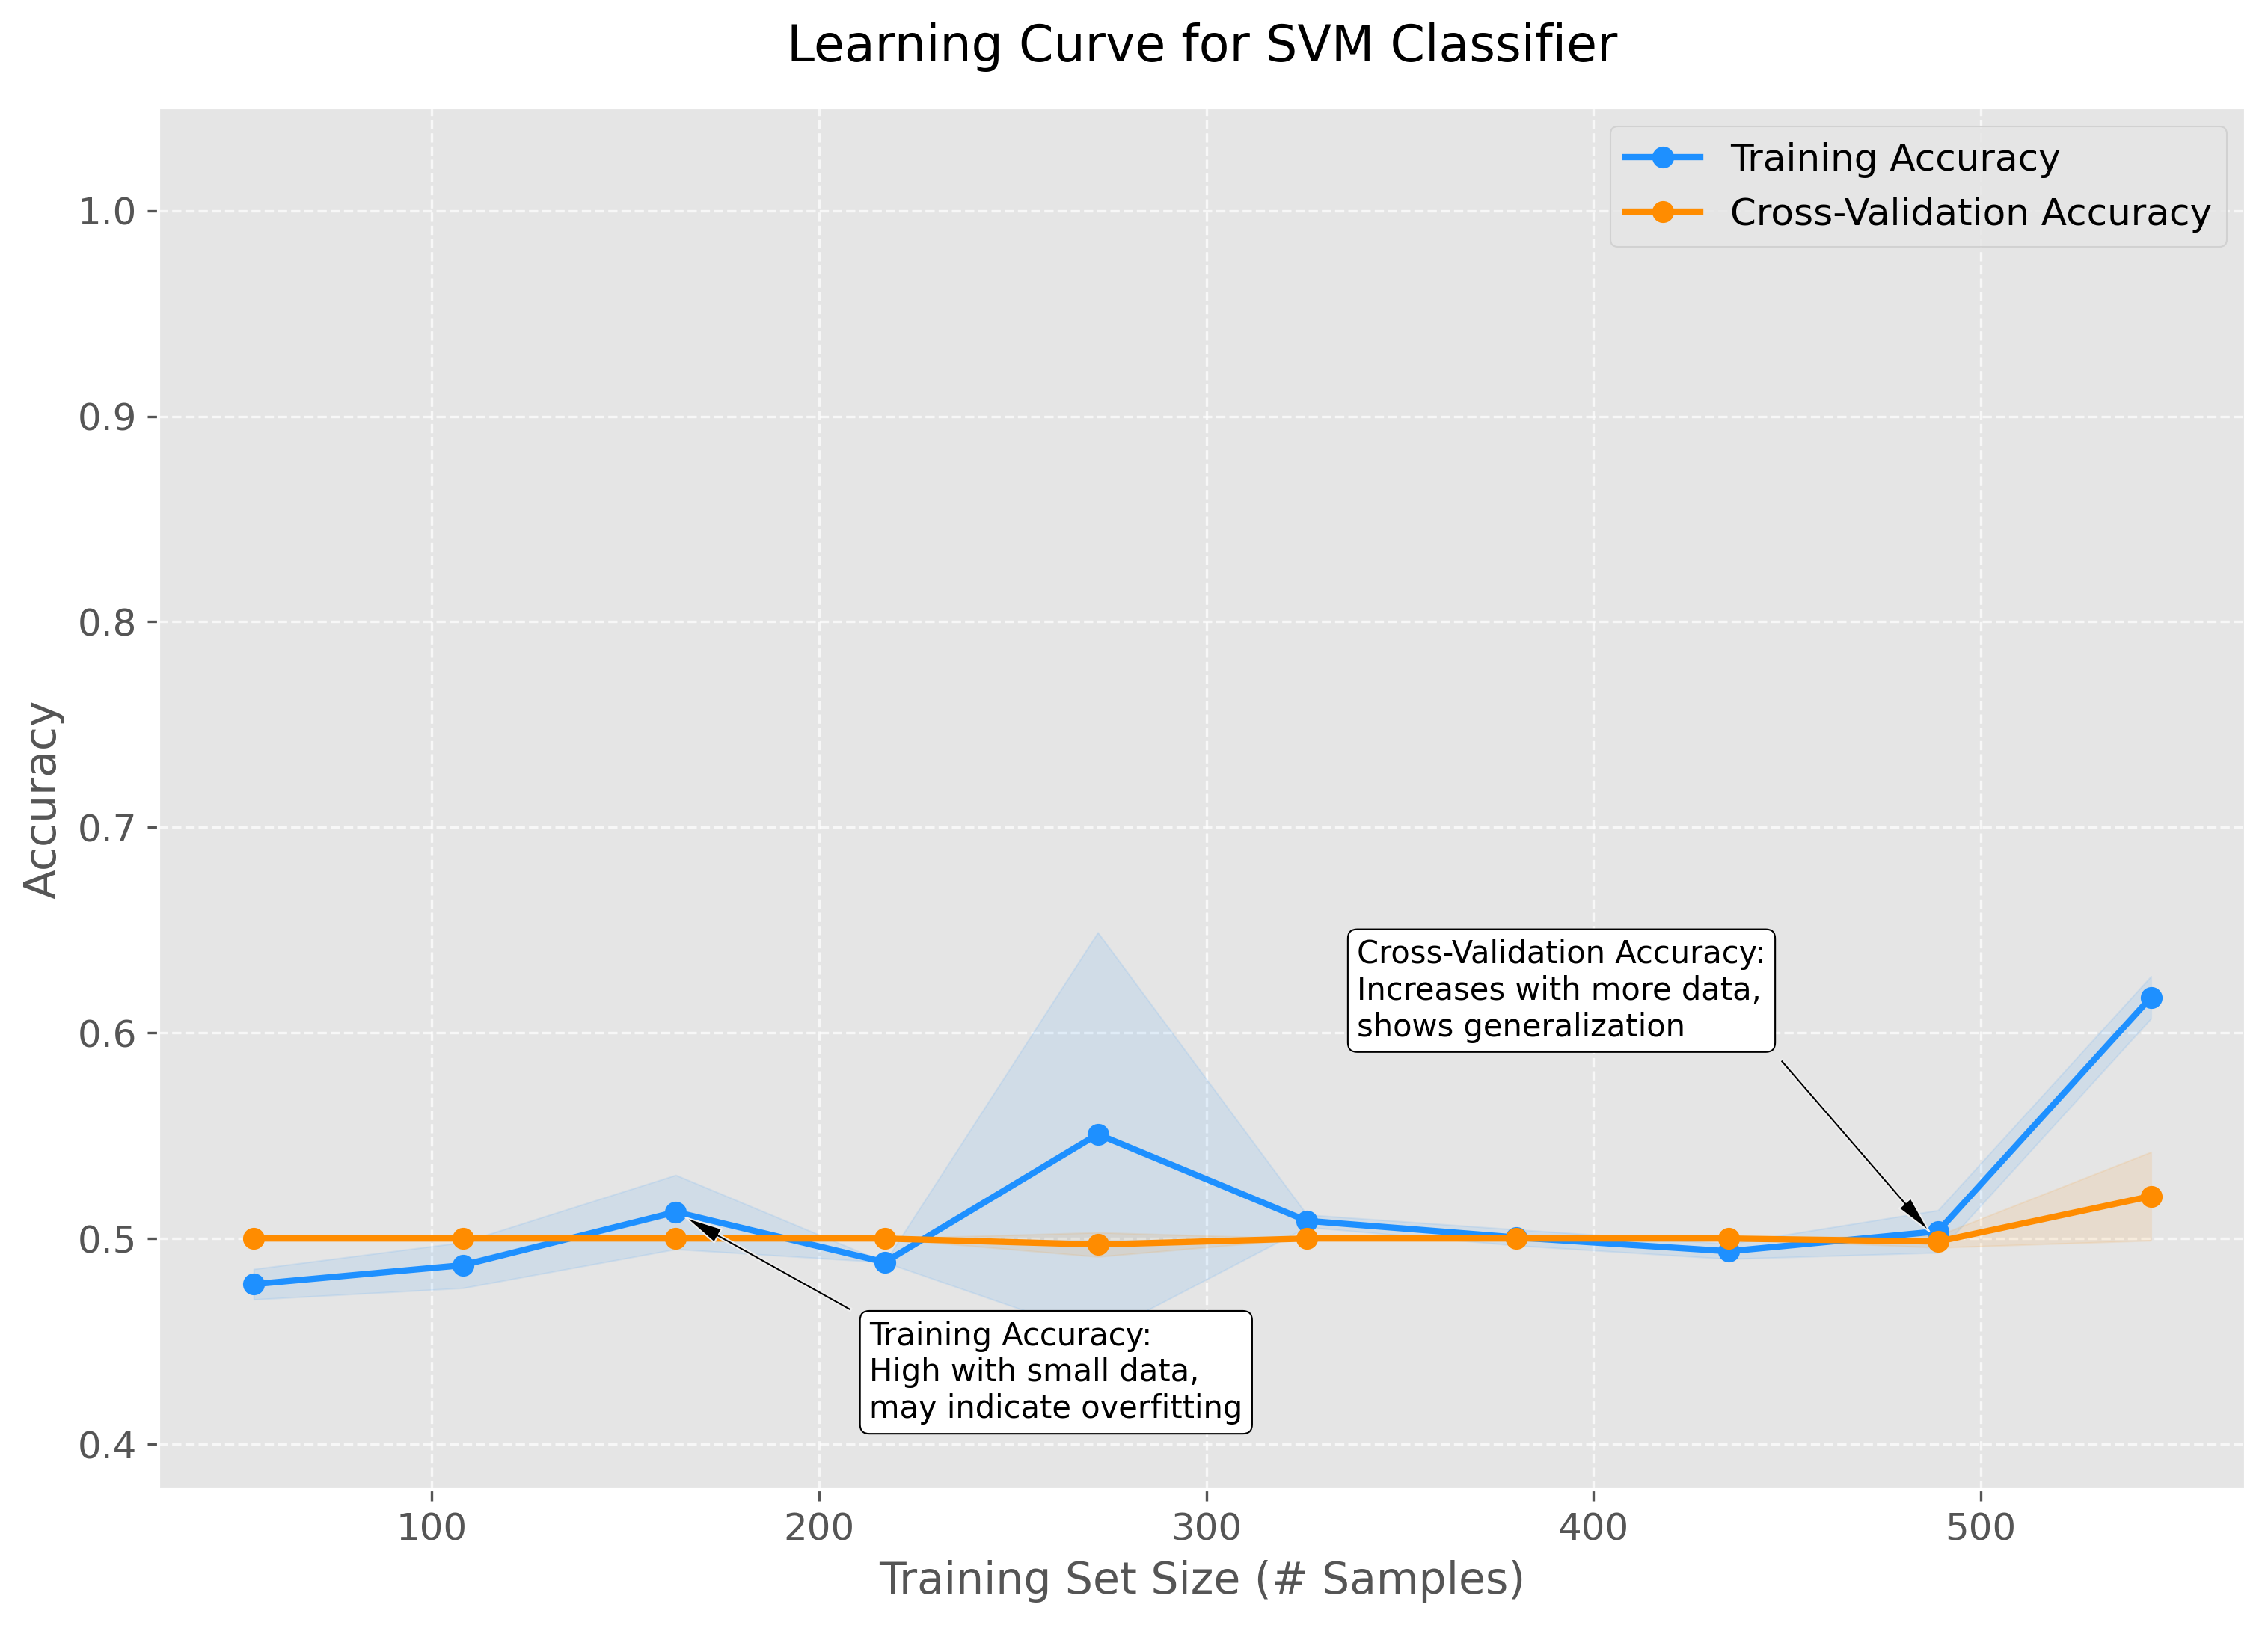

In [69]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Hyperparameter tuning with GridSearchCV
svm = SVC(class_weight='balanced', random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

# Perform GridSearchCV
svm_cv = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_cv.fit(X_train, y_train)

# Print best parameters and cross-validation accuracy
print(f"Best SVM Parameters: {svm_cv.best_params_}")
print(f"Best Cross-Validation Accuracy (GridSearchCV): {svm_cv.best_score_:.4f}")

# Step 2: Generate learning curve data using the best parameters
best_svm = SVC(**svm_cv.best_params_, class_weight='balanced', random_state=42)

# Define training sizes (10% to 100% of training data)
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute learning curve scores
train_sizes, train_scores, val_scores = learning_curve(
    best_svm,
    X_train,
    y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Step 3: Create high-quality learning curve plot
plt.figure(figsize=(12, 8), dpi=300)  # High-resolution figure
plt.plot(train_sizes, train_scores_mean, 'o-', color='dodgerblue', label='Training Accuracy', linewidth=2)
plt.plot(train_sizes, val_scores_mean, 'o-', color='darkorange', label='Cross-Validation Accuracy', linewidth=2)

# Add shaded regions for standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='dodgerblue')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='darkorange')

# Customize plot
plt.xlabel('Training Set Size (# Samples)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Learning Curve for SVM Classifier', fontsize=16, pad=15)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add annotations for student explanation
plt.annotate('Training Accuracy:\nHigh with small data,\nmay indicate overfitting',
            xy=(train_sizes[2], train_scores_mean[2]),
            xytext=(train_sizes[2] + 50, train_scores_mean[2] - 0.1),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
            fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.annotate('Cross-Validation Accuracy:\nIncreases with more data,\nshows generalization',
            xy=(train_sizes[-2], val_scores_mean[-2]),
            xytext=(train_sizes[-2] - 150, val_scores_mean[-2] + 0.1),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
            fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Ensure y-axis starts at a reasonable value for clarity
plt.ylim(min(min(train_scores_mean), min(val_scores_mean)) - 0.1, 1.05)

# Save plot as high-quality image
# plt.savefig('svm_learning_curve_high_quality.png', dpi=300, bbox_inches='tight')
plt.show()

# **लॉजिस्टिक रिग्रेशन**

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Hyperparameter tuning with GridSearchCV
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Define parameter grid for C, penalty, and solver
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear supports both l1 and l2
}

# Add saga solver for l1 and l2 penalties separately to avoid incompatibility
param_grid_saga = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['saga']
}

# Combine parameter grids
param_grid.update(param_grid_saga)

# Perform GridSearchCV to find the best parameters
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
logreg_cv.fit(X_train, y_train)

# Print best parameters and cross-validation accuracy
print(f"Best Logistic Regression Parameters: {logreg_cv.best_params_}")
print(f"Best Cross-Validation Accuracy (GridSearchCV): {logreg_cv.best_score_:.4f}")

# Step 2: Cross-validation with the best model
best_logreg = logreg_cv.best_estimator_
cv_scores = cross_val_score(best_logreg, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f"\nCross-Validation Accuracy (Best Logistic Regression): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Step 3: Train the best model on the full training set
best_logreg.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred_logreg = best_logreg.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"\nTest Set Accuracy (Logistic Regression): {accuracy:.4f}")
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))

Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Accuracy (GridSearchCV): 0.5000

Cross-Validation Accuracy (Best Logistic Regression): 0.5000 ± 0.0000

Test Set Accuracy (Logistic Regression): 0.5029

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.50      1.00      0.67        86

    accuracy                           0.50       171
   macro avg       0.25      0.50      0.33       171
weighted avg       0.25      0.50      0.34       171



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **THE** **END**

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
    random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean() > 0.999

np.True_

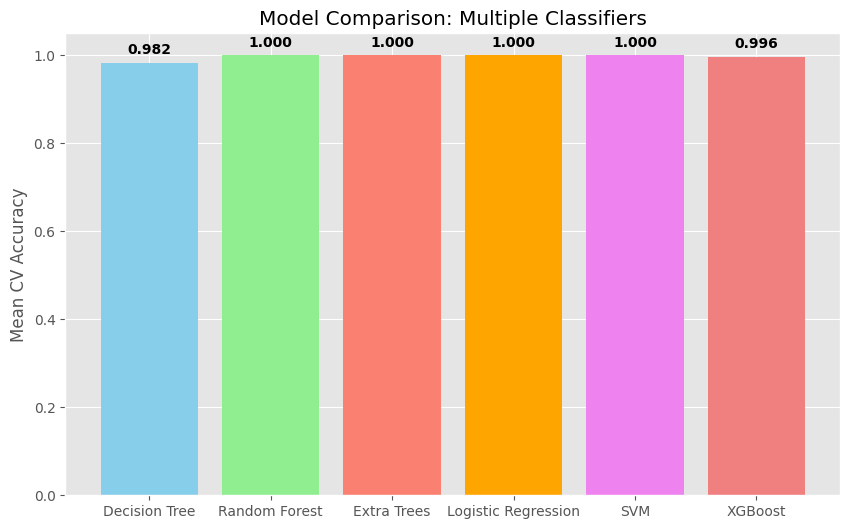

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Generate synthetic dataset
X, y = make_blobs(n_samples=10000, n_features=10, centers=100, random_state=0)

# Define classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=None, random_state=0),
    "Extra Trees": ExtraTreesClassifier(n_estimators=50, max_depth=None, random_state=0),
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="lbfgs", random_state=0),
    "SVM": SVC(kernel="rbf", random_state=0),
    "XGBoost": XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, subsample=0.8,
                             colsample_bytree=0.8, use_label_encoder=False, eval_metric="mlogloss", random_state=0)
}

# Store mean cross-validation scores
results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=5, n_jobs=-1)  # parallel execution
    results[name] = scores.mean()

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(),
        color=["skyblue", "lightgreen", "salmon", "orange", "violet", "lightcoral"])
plt.ylabel("Mean CV Accuracy")
plt.title("Model Comparison: Multiple Classifiers")
plt.ylim(0, 1.05)  # accuracy scale

# Annotate scores
for i, (name, score) in enumerate(results.items()):
    plt.text(i, score + 0.02, f"{score:.3f}", ha="center", fontsize=10, fontweight="bold")

plt.show()
